In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings("ignore")
sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

print("imported")

imported


In [2]:
import json
import requests
import folium
import branca

In [3]:
location = "/config/workspace/machine datasets/rideshare_kaggle.csv"
data = pd.read_csv(location)
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [5]:
uber = data[data["cab_type"] == "Uber"].reset_index(drop=True)
uber.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,22,30,11,2018-11-30 22:13:01,America/New_York,North End,West End,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,10,13,12,2018-12-13 10:50:11,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,23,16,12,2018-12-16 23:55:11,America/New_York,North End,West End,Uber,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [6]:
uniques = dict()
for i in uber.select_dtypes("object"):
    unique_count = uber[i].nunique()
    #print(f"{i} : {unique_count}")
    uniques.update({i:unique_count})
uc_df = pd.DataFrame(uniques, index = ["unique_count"]).T
uc_df[uc_df["unique_count"] > 10]

,unique_count
id,385663
datetime,30346
source,12
destination,12
long_summary,11


In [7]:
drop_cols = ["cab_type", "timestamp", "product_id", "timezone", "latitude", "longitude", "surge_multiplier"]
drop_cols.extend(list(uc_df[uc_df["unique_count"] > 10].index))
uber_df1 = uber.drop(drop_cols, axis = 1)
uber_df1.head()

,hour,day,month,name,price,distance,temperature,apparentTemperature,short_summary,precipIntensity,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,22,30,11,UberXL,12.0,1.11,40.13,38.08,Overcast,0.0000,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,10,13,12,Black,16.0,1.11,20.38,20.38,Clear,0.0000,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,19,13,12,UberX,7.5,1.11,32.85,32.85,Mostly Cloudy,0.0000,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,23,16,12,WAV,7.5,1.11,41.29,36.01,Light Rain,0.0567,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,0,14,12,Black SUV,26.0,1.11,31.25,31.25,Overcast,0.0000,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [8]:
uber_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385663 entries, 0 to 385662
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         385663 non-null  int64  
 1   day                          385663 non-null  int64  
 2   month                        385663 non-null  int64  
 3   name                         385663 non-null  object 
 4   price                        330568 non-null  float64
 5   distance                     385663 non-null  float64
 6   temperature                  385663 non-null  float64
 7   apparentTemperature          385663 non-null  float64
 8   short_summary                385663 non-null  object 
 9   precipIntensity              385663 non-null  float64
 10  precipProbability            385663 non-null  float64
 11  humidity                     385663 non-null  float64
 12  windSpeed                    385663 non-null  float64
 13 

In [9]:
nulls = pd.DataFrame(data.isnull().sum(), columns=["nulls"])
nulls["null percentage"] = nulls["nulls"]/uber_df1.shape[0]*100
nulls[nulls["nulls"] > 0]

,nulls,null percentage
price,55095,14.285788


In [10]:
'''
uber_num = uber_df1.select_dtypes("number")
from sklearn.impute import KNNImputer
uber_num = KNNImputer().fit_transform(uber_num)
uber_num.isnull().sum()
'''

# -- since the missing value is in a target column itself, it is dropped.

uber_df1.dropna(inplace = True)

In [11]:
#uber_df1.duplicated().sum()
uber_df1.drop_duplicates(inplace = True)

In [14]:
import pandas as pd

# Assuming uber_df1 is your DataFrame
# You can either drop non-numeric columns
numeric_df = uber_df1.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Apply gradient color scheme to the correlation matrix
styled_corr_matrix = corr_matrix.style.background_gradient()

# Display the styled correlation matrix
styled_corr_matrix


,hour,day,month,price,distance,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
hour,1.000000,0.067367,-0.080307,0.001343,0.002594,0.219855,0.199028,-0.228372,-0.127039,-0.275005,0.073270,0.075393,-0.027499,0.173726,0.006162,-0.027357,0.017894,-0.026426,0.007125,-0.027541,0.017807,-0.026566,0.006560,-0.062978,0.031257,0.022423,0.331430,0.173726,0.029812,-0.027125,-0.027123,0.019578,0.020958,-0.027107,0.017265,-0.026778,0.003937,-0.027512,0.018021,-0.027212,0.004588,-0.027315
day,0.067367,1.000000,-0.856871,0.007094,0.009628,-0.084750,-0.219653,0.091653,0.031586,-0.092167,0.431888,0.394739,-0.319599,0.101762,-0.278644,-0.326333,-0.101508,-0.316485,-0.390774,-0.326484,-0.200356,-0.318355,-0.101829,-0.426800,0.083961,-0.048488,-0.013784,0.101762,0.362330,-0.324104,-0.324048,-0.020029,0.150765,-0.324211,0.036375,-0.316446,-0.299122,-0.327783,-0.021329,-0.317388,-0.436313,-0.327635
month,-0.080307,-0.856871,1.000000,-0.007774,-0.008654,-0.084450,0.016120,-0.156214,-0.098284,-0.025352,-0.319258,-0.255766,0.761374,0.015521,0.058351,0.766214,-0.130386,0.759423,0.138587,0.766310,-0.085569,0.760713,-0.077639,0.572148,-0.126123,-0.007108,-0.010729,0.015521,-0.122415,0.764718,0.764680,-0.447582,-0.220602,0.764786,-0.192674,0.758873,0.094893,0.767178,-0.193773,0.759578,0.200304,0.767066
price,0.001343,0.007094,-0.007774,1.000000,0.347920,0.001417,-0.000457,0.002674,0.001720,-0.001403,0.006802,0.007138,-0.005344,0.001418,-0.001952,-0.005457,0.001132,-0.005376,-0.003413,-0.005482,0.000198,-0.005413,0.000398,-0.008285,-0.000413,0.002750,-0.001054,0.001418,0.006653,-0.005456,-0.005456,0.002160,0.002527,-0.005458,0.001845,-0.005411,-0.001996,-0.005494,0.000559,-0.005435,-0.003673,-0.005511
distance,0.002594,0.009628,-0.008654,0.347920,1.000000,-0.000305,-0.002682,0.000954,0.000259,-0.003763,0.007757,0.006507,-0.003805,0.005550,-0.005419,-0.003803,-0.001548,-0.003712,-0.006981,-0.003826,-0.003471,-0.003721,-0.002049,-0.008272,-0.001137,0.000938,0.001550,0.005550,0.008883,-0.003845,-0.003845,-0.000051,0.003748,-0.003851,0.000605,-0.003992,-0.005973,-0.003802,-0.001029,-0.003899,-0.008071,-0.003822
temperature,0.219855,-0.084750,-0.084450,0.001417,-0.000305,1.000000,0.946900,0.179159,0.233947,0.317434,0.052511,-0.014757,-0.251876,-0.320362,0.791415,-0.261165,0.507774,-0.258373,0.714117,-0.262603,0.386236,-0.257631,0.865374,-0.346128,-0.244716,0.354480,0.159778,-0.320362,-0.295996,-0.259068,-0.259069,0.349785,0.331882,-0.258564,0.791063,-0.246968,0.783583,-0.257803,0.819154,-0.235720,0.707889,-0.259205
apparentTemperature,0.199028,-0.219653,0.016120,-0.000457,-0.002682,0.946900,1.000000,0.094989,0.152618,0.359545,-0.248425,-0.291074,-0.234272,-0.294070,0.822904,-0.243935,0.582817,-0.244628,0.813576,-0.244774,0.500970,-0.242362,0.851444,-0.143541,-0.292965,0.296862,0.140579,-0.294070,-0.465533,-0.242596,-0.242616,0.332169,0.256088,-0.242265,0.700575,-0.236041,0.793552,-0.238418,0.789583,-0.223663,0.784474,-0.239379
precipIntensity,-0.228372,0.091653,-0.156214,0.002674,0.000954,0.179159,0.094989,1.000000,0.835819,0.411054,0.305720,0.198135,-0.176261,-0.594652,0.117495,-0.182900,0.232288,-0.182395,0.111602,-0.184005,0.183062,-0.181404,0.332195,-0.151461,-0.424955,0.287638,-0.096193,-0.594652,-0.214300,-0.181781,-0.181760,0.081439,0.495621,-0.181097,0.232732,-0.183361,0.112118,-0.182808,0.221575,-0.171877,0.105451,-0.183795
precipProbability,-0.127039,0.031586,-0.098284,0.001720,0.000259,0.233947,0.152618,0.835819,1.00000

In [15]:
uber_cat = uber_df1.select_dtypes("object")
uber_cat.head()

,name,short_summary,icon
0,UberXL,Overcast,cloudy
1,Black,Clear,clear-night
2,UberX,Mostly Cloudy,partly-cloudy-day
3,WAV,Light Rain,rain
4,Black SUV,Overcast,cloudy


ValueError: Input data must be a pandas object to reorder

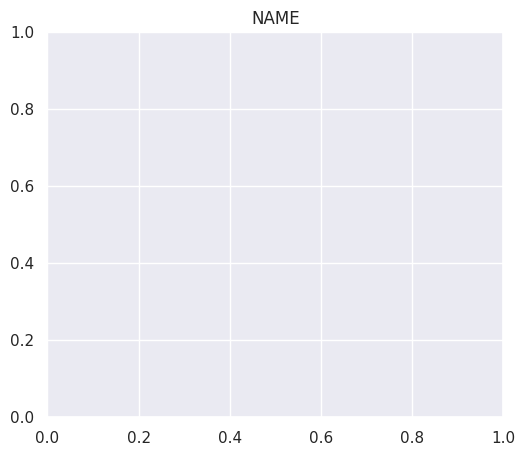

In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `uber_cat` is your DataFrame

# Define the number of rows (a), number of columns (b), and the starting position (c) for subplots
a, b, c = 1, 3, 1

# Set the figure size
plt.figure(figsize=(20, 5))

# Iterate over the columns in uber_cat
for i in uber_cat.columns:
    # Create a subplot
    plt.subplot(a, b, c)
    
    # Set the title for the subplot
    plt.title(i.upper(), fontsize=12)
    
    # Convert the column to a pandas Series
    data = pd.Series(uber_cat[i])
    
    # Get the value counts for the column
    value_counts = data.value_counts()
    
    # Sort the categories based on counts in descending order
    ordered_categories = value_counts.sort_values(ascending=False).index
    
    # Create the count plot using seaborn
    sns.countplot(data, palette="ocean_d", order=ordered_categories)
    
    # Rotate the x-axis labels for better visibility
    plt.xticks(rotation=90)
    
    # Increment the subplot position
    c = c + 1

# Display the subplots
plt.show()


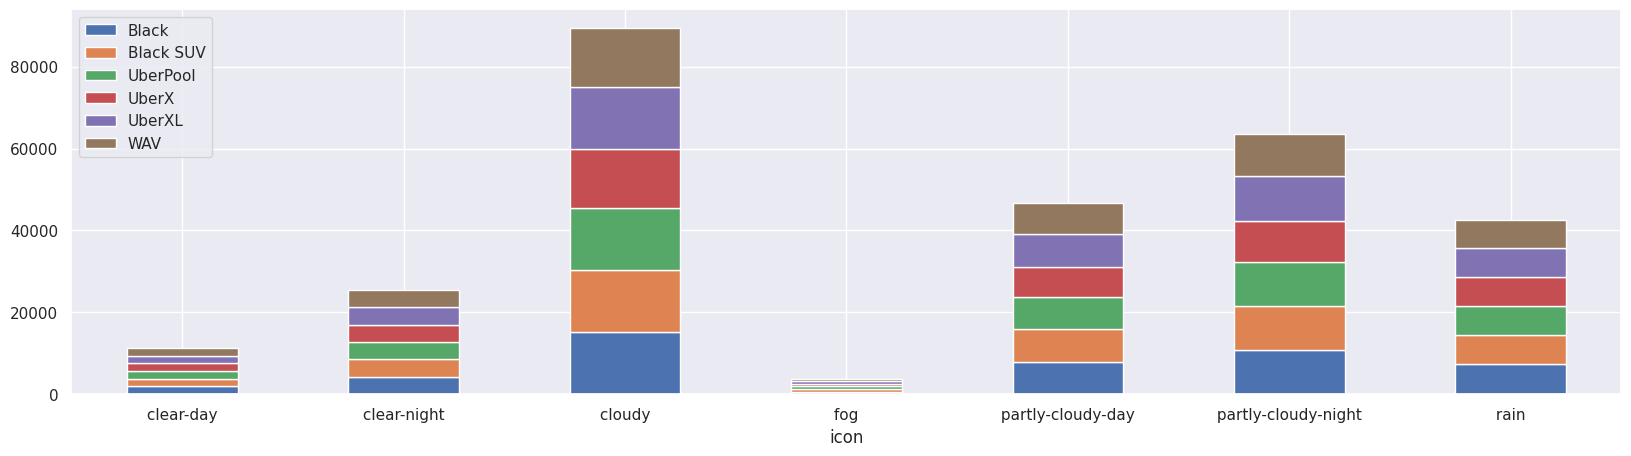

In [21]:
pd.crosstab(uber_cat["icon"], uber_cat["name"]).plot(kind = "bar", stacked = True, figsize = (20,5))
plt.xticks(rotation = 360)
plt.legend(loc = "upper left")
plt.show()

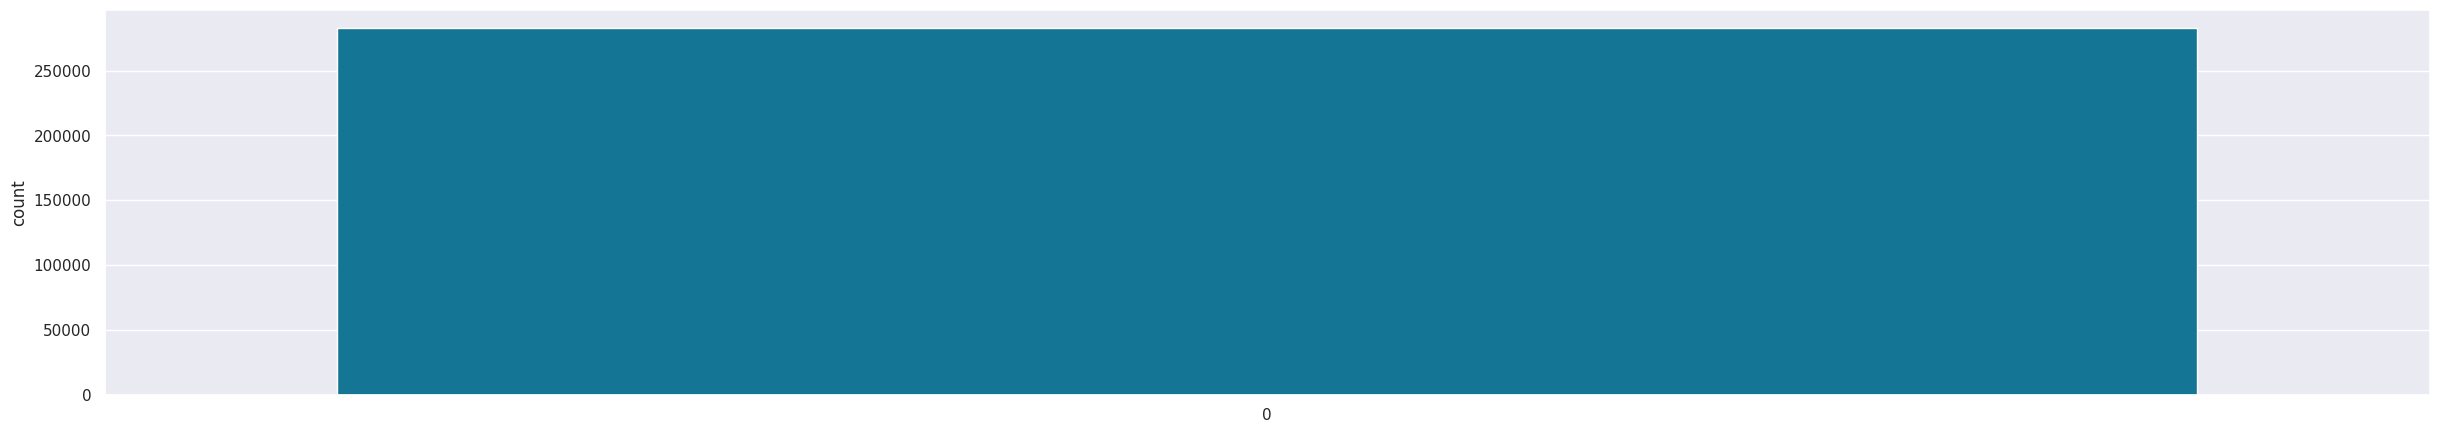

In [23]:
plt.figure(figsize = (30,5))
sns.countplot(uber_df1["hour"], palette = "ocean_d")
plt.show()

In [24]:
hour = uber_df1.groupby(["hour"]).mean().drop(["day","month","distance"], axis = 1)
scaled = StandardScaler().fit_transform(hour)
hour[hour.columns] = scaled
hour.reset_index(inplace = True)
x = hour["hour"]
y = hour.drop(["hour"], axis = 1)
plt.figure(figsize = (30,10))
plt.plot(x,y)
plt.legend(y.columns, ncol = 2, bbox_to_anchor=(1, 1))
plt.show()


TypeError: Could not convert Black SUVWAVWAVUberXBlack SUVBlackWAVBlack SUVBlackUberPoolWAVWAVBlack SUVUberPoolUberXUberPoolUberXLBlack SUVBlackWAVUberXUberXUberXLBlack SUVBlackUberXLWAVBlack SUVBlack SUVUberXWAVUberXBlack SUVWAVBlackUberPoolBlack SUVUberXLUberXBlack SUVBlackUberXBlack SUVUberXBlackBlackUberXLBlack SUVBlackBlack SUVWAVBlack SUVWAVUberXBlack SUVUberXWAVUberXLUberPoolBlack SUVBlackUberXLBlack SUVUberXLBlackWAVUberPoolUberXLUberXUberXLBlack SUVUberXLBlackWAVWAVUberPoolBlackWAVBlackUberXLBlackUberXUberPoolWAVBlackUberXUberPoolBlackUberXLBlackWAVUberPoolWAVUberXLBlackUberPoolUberXLUberXLBlack SUVBlackUberXLUberXUberXLUberPoolBlack SUVBlack SUVUberXLWAVUberXBlack SUVUberXUberPoolBlack SUVUberPoolBlack SUVUberXUberPoolBlackBlackUberXLUberXLUberXLBlackUberXUberPoolUberXLBlackBlackUberXLUberXBlack SUVUberPoolWAVUberPoolUberXLWAVBlackUberXUberXLUberXLUberXLBlackBlack SUVBlack SUVUberXLBlack SUVUberPoolUberPoolBlack SUVBlack SUVUberXLUberXBlackUberXUberXLWAVBlack SUVUberXUberXLUberXLBlack SUVWAVBlackBlackWAVUberPoolUberXLBlack SUVBlackUberXLUberXLUberXLWAVBlack SUVUberXLUberPoolUberXLBlack SUVBlackUberPoolUberPoolUberXBlackWAVUberXWAVUberXUberXBlack SUVUberXBlack SUVBlack SUVUberPoolUberXLUberPoolUberPoolUberXBlackBlackUberXUberXBlack SUVUberXLUberXUberXUberXLBlackBlackWAVUberPoolUberPoolWAVUberXWAVUberPoolWAVUberPoolUberPoolUberXBlackWAVUberXLUberXLUberXLUberXUberXLUberPoolBlack SUVUberXLWAVBlack SUVUberXUberXLWAVBlack SUVUberXLUberPoolBlack SUVUberXUberXLBlack SUVWAVBlackBlack SUVBlackBlack SUVUberXLUberPoolUberXUberPoolWAVUberPoolBlackUberXLUberPoolUberXUberXLBlack SUVBlack SUVUberPoolBlackBlack SUVBlack SUVUberPoolBlackUberPoolBlack SUVUberXLUberXLBlack SUVBlack SUVUberPoolUberXLBlack SUVUberXUberPoolUberXLWAVUberPoolUberXUberXLWAVUberPoolUberXBlack SUVUberXUberXLBlackBlack SUVBlackBlack SUVUberPoolWAVUberPoolUberXUberXLWAVBlack SUVUberXBlackWAVUberXBlackUberXUberXLBlack SUVUberXLBlack SUVUberPoolUberXLWAVWAVUberXLUberXWAVUberPoolWAVWAVBlack SUVBlackUberPoolWAVUberPoolWAVBlack SUVBlack SUVWAVUberXUberPoolWAVWAVWAVBlack SUVWAVUberXWAVBlackUberPoolBlackBlackBlack SUVBlack SUVUberPoolUberXLBlackUberXUberPoolUberXLUberXLBlack SUVBlack SUVWAVBlack SUVBlackUberPoolBlack SUVBlack SUVUberXLUberXUberPoolBlackBlackBlackBlack SUVUberPoolBlackWAVWAVBlack SUVUberXLUberXLBlack SUVBlackUberPoolBlack SUVBlack SUVUberPoolBlack SUVWAVWAVBlackUberXLUberXUberXLBlackBlackUberXUberXLBlack SUVUberPoolBlack SUVUberPoolWAVBlack SUVUberPoolBlackUberPoolUberPoolWAVUberXWAVUberXUberXWAVWAVBlack SUVWAVBlackWAVUberPoolBlack SUVUberXUberXLUberXLUberXUberXLUberPoolUberXLUberPoolUberXUberXLUberPoolWAVBlackUberPoolWAVUberPoolUberPoolBlackBlack SUVWAVUberXWAVUberXUberXLUberXLWAVBlack SUVWAVBlack SUVUberXUberPoolUberPoolUberXUberXBlackUberXUberXLUberPoolBlackUberXLWAVWAVUberXLWAVWAVUberXUberXUberXLBlack SUVWAVUberXBlackBlackUberXLUberXBlackBlackBlack SUVUberPoolBlackUberXBlackUberXWAVUberPoolUberXLBlack SUVWAVUberXUberXLUberXLBlack SUVUberPoolBlack SUVBlackWAVUberXLWAVBlack SUVUberXBlack SUVUberXLBlack SUVWAVBlackUberPoolBlack SUVBlackUberXLUberXLWAVUberPoolUberXLUberXBlack SUVBlackWAVWAVBlackBlack SUVUberPoolWAVBlack SUVUberXBlack SUVBlackUberPoolBlackUberXLWAVUberXUberXBlack SUVUberXLBlackBlackUberXLUberXUberPoolUberXUberXUberXLUberXUberXLWAVUberXUberXUberXUberPoolUberXLBlackBlackUberXBlackBlackUberXBlack SUVUberXBlackBlackUberXLBlack SUVBlack SUVUberPoolUberXLBlackUberXBlack SUVBlackBlack SUVWAVBlackUberXLWAVBlackUberXLBlackUberPoolUberXUberXLUberXUberPoolUberXUberXLWAVBlack SUVUberXBlackUberXLWAVBlackUberXLUberXBlack SUVBlackUberXUberXLUberPoolWAVUberXUberXBlack SUVWAVWAVUberXBlack SUVWAVBlackBlackBlack SUVWAVUberXLBlackWAVBlack SUVBlack SUVUberPoolUberPoolWAVUberPoolUberXUberPoolUberXBlackWAVBlack SUVWAVUberXLBlackBlack SUVBlack SUVBlackUberXLBlackUberXUberXLUberPoolWAVBlack SUVUberXUberPoolUberXWAVBlack SUVUberPoolWAVUberPoolBlackBlackWAVBlack SUVWAVUberPoolWAVUberXBlackBlack SUVBlack SUVUberXLBlack SUVUberXLUberXLUberXLUberPoolUberXBlack SUVUberPoolUberPoolBlack SUVBlack SUVUberXWAVWAVBlack SUVUberXLBlackUberXLBlackUberXUberXLBlackUberPoolUberXUberPoolWAVBlackUberXBlack SUVUberXUberXLWAVUberXUberXLUberXWAVBlack SUVUberXLWAVBlackUberPoolUberPoolBlackBlackWAVUberPoolBlack SUVUberXUberXLWAVUberPoolBlackBlackBlack SUVUberXUberXLUberXBlackUberXUberXUberPoolBlack SUVUberPoolBlackUberXUberXUberXUberPoolBlack SUVUberXBlack SUVUberPoolBlack SUVBlackWAVBlack SUVBlack SUVBlackUberPoolBlackBlackBlack SUVUberXBlack SUVUberXLBlackUberPoolUberXBlackWAVUberPoolBlackUberXUberXBlackUberXLBlack SUVBlack SUVUberXLWAVUberXUberPoolUberXWAVBlack SUVBlackWAVUberPoolUberPoolWAVBlackUberXLWAVBlackUberXUberXLUberXLBlack SUVWAVUberXLBlackUberXLBlack SUVWAVBlackUberXUberXLBlackBlackBlackWAVUberXLWAVWAVWAVBlack SUVBlackUberPoolWAVUberXBlackBlack SUVBlackUberPoolUberPoolWAVBlackBlackUberPoolBlack SUVUberPoolUberXLUberXLUberXLBlackWAVWAVBlack SUVUberXLBlack SUVUberXUberXLUberPoolUberXLUberPoolUberPoolUberXUberXUberXLWAVBlack SUVUberXBlack SUVUberXUberXBlackUberXLUberXLUberPoolBlack SUVUberXUberXUberXBlackUberXUberXBlack SUVBlack SUVBlackUberXBlack SUVUberPoolUberXUberPoolUberXLWAVUberPoolBlackUberPoolBlackBlackBlack SUVBlack SUVBlack SUVUberPoolWAVBlackBlack SUVWAVUberPoolWAVUberXLBlack SUVUberPoolWAVBlack SUVWAVBlack SUVUberPoolWAVBlack SUVBlackUberXBlack SUVUberXUberXBlack SUVUberPoolUberXLUberPoolUberPoolBlack SUVWAVUberPoolUberXBlack SUVUberXLUberXLUberPoolBlack SUVUberXLUberXBlackBlack SUVBlack SUVWAVUberXLBlackUberXLBlack SUVBlack SUVBlackUberPoolUberXUberXLUberXBlack SUVUberPoolWAVBlack SUVBlackUberXWAVUberPoolUberXLUberXUberXLBlackBlackWAVUberXBlackUberXLBlack SUVBlackBlack SUVBlack SUVBlackUberXLBlackUberPoolWAVUberXUberXLUberXBlackUberXWAVWAVBlack SUVBlackUberXUberXBlackWAVUberXLBlack SUVBlackBlack SUVBlackUberPoolUberPoolBlackUberXLWAVUberPoolUberXBlackUberXLWAVBlackUberXLUberXLBlack SUVBlackBlack SUVUberPoolUberXLUberXBlackWAVUberPoolUberXLUberXUberPoolBlackUberXUberPoolBlack SUVUberXLUberPoolBlackUberXLUberPoolUberXBlack SUVUberPoolUberXLUberXLWAVUberPoolBlack SUVUberPoolUberXLBlackBlack SUVWAVBlackUberXLUberPoolBlack SUVUberXUberXBlack SUVUberXLBlack SUVWAVUberPoolBlack SUVBlack SUVBlackUberXLWAVUberPoolUberPoolBlackUberXLWAVUberXBlackBlack SUVUberPoolBlackUberXWAVUberPoolWAVUberXLUberXLBlackBlack SUVBlack SUVWAVBlackUberXBlack SUVUberPoolBlack SUVUberPoolUberPoolWAVUberPoolUberXUberPoolUberXUberXUberPoolBlack SUVUberXLUberXLUberXLUberXUberPoolUberXLUberPoolUberXUberXLBlack SUVUberXLWAVUberXUberXBlackBlack SUVBlack SUVUberXLBlackUberXBlackUberXLWAVWAVUberPoolUberPoolWAVUberPoolBlackUberPoolBlack SUVUberPoolUberXLUberPoolWAVWAVWAVUberXLBlackBlack SUVBlackUberPoolBlackUberPoolUberPoolBlackBlackUberPoolBlack SUVBlack SUVBlackBlackBlackWAVWAVWAVWAVUberXLUberXWAVBlack SUVBlack SUVBlackUberXUberXLUberPoolBlack SUVUberXBlack SUVWAVUberXLUberPoolBlack SUVWAVBlack SUVBlackUberXLBlack SUVBlackBlack SUVUberXBlack SUVWAVWAVUberXBlack SUVUberXUberPoolUberXWAVUberXBlack SUVUberXLUberXUberPoolBlackUberPoolBlackUberXLUberPoolUberXLUberXUberXLWAVUberPoolBlackBlack SUVUberPoolUberXLBlackUberXLUberPoolUberPoolBlackUberPoolWAVUberXLBlack SUVUberXLUberXBlack SUVWAVUberXLUberXWAVUberPoolWAVBlack SUVUberPoolBlackUberXUberXLBlackBlack SUVUberPoolUberXLWAVBlack SUVBlack SUVBlackUberPoolBlack SUVBlackUberXUberXBlackBlackUberXUberPoolUberXUberPoolUberXBlack SUVBlackWAVBlack SUVUberPoolUberPoolUberXUberXLBlackBlack SUVUberXUberPoolWAVUberXLUberPoolUberXUberPoolUberXLBlack SUVUberXUberXBlackUberPoolBlackUberXLBlack SUVUberXLBlackBlackWAVUberXLBlackBlack SUVUberPoolUberPoolBlackWAVUberPoolBlackWAVUberXUberXLBlack SUVUberXLUberPoolUberXUberXUberXWAVWAVUberPoolWAVWAVWAVUberXBlack SUVUberXUberPoolWAVUberXBlack SUVUberXLUberXLWAVUberXLUberXBlackUberXLWAVUberXBlack SUVBlackUberPoolUberPoolWAVBlackWAVUberXBlack SUVUberXLBlackUberPoolUberXUberXLWAVWAVUberPoolUberXWAVBlack SUVUberPoolUberXUberXWAVUberXBlack SUVBlackUberPoolUberXLUberPoolUberPoolWAVBlackUberXLUberXUberXLWAVWAVUberXBlack SUVBlackBlackWAVBlackUberXBlackWAVUberPoolUberPoolWAVUberXLUberXUberPoolUberXLBlack SUVBlack SUVWAVUberXUberPoolBlack SUVUberXLWAVBlackUberXUberXBlack SUVUberXUberXUberXLBlackUberXLUberXLBlack SUVUberXWAVUberXWAVUberXWAVBlackUberXLBlackUberPoolWAVUberPoolBlackUberXUberXLUberXLUberXBlack SUVUberXLBlackBlackBlackWAVUberXBlack SUVUberPoolBlackBlackBlackUberPoolBlackUberXLBlack SUVUberPoolWAVUberXBlackBlackBlack SUVBlack SUVWAVUberXUberPoolUberXLWAVUberXLUberXBlackBlackBlackUberXBlack SUVUberXLBlack SUVUberXLUberPoolBlackUberXLBlack SUVUberXUberPoolUberXLUberPoolUberXUberPoolBlack SUVBlack SUVUberXLUberPoolUberXBlackUberXLUberPoolUberPoolUberPoolBlack SUVUberXUberXUberPoolBlackWAVUberXBlackWAVUberXLUberXWAVUberXUberXLUberPoolUberXLUberXLUberXLBlack SUVUberXWAVUberXLUberXUberPoolUberXUberXLWAVBlack SUVUberXLUberXLUberXUberXBlack SUVUberXLWAVUberPoolBlack SUVBlack SUVBlackWAVBlackUberPoolUberPoolUberXBlackBlackUberPoolUberPoolUberXLUberXLUberXLBlack SUVUberXUberPoolUberXLWAVWAVUberPoolUberXLWAVBlack SUVBlackUberXLUberXWAVUberXLUberXLBlackBlackUberXWAVUberXLUberPoolUberXUberXLBlackUberXLUberXWAVUberPoolWAVBlack SUVUberXLUberPoolBlack SUVBlackWAVWAVUberPoolUberXLBlack SUVUberXLWAVBlackUberXUberXLBlack SUVUberXUberPoolBlackUberXUberXLWAVUberXLUberPoolUberPoolUberXUberXUberXBlack SUVUberXLWAVUberXLWAVBlack SUVBlackUberXBlack SUVUberPoolWAVBlackUberXLBlackUberXLWAVBlackBlackBlack SUVUberPoolBlack SUVUberPoolWAVWAVUberXLUberXLUberXBlack SUVWAVUberXLUberXBlack SUVWAVWAVUberXLBlackUberXWAVBlackUberXLUberXBlackBlackBlack SUVUberXLUberXLUberXBlack SUVUberXBlackWAVUberPoolBlackUberPoolUberXBlack SUVBlack SUVUberPoolUberXUberXUberXUberXUberPoolBlack SUVBlackBlackWAVUberXLWAVBlackUberPoolUberXBlackUberXLUberXUberPoolBlackBlack SUVWAVUberXLUberXLUberXBlackUberXLUberPoolUberXUberPoolUberPoolUberXLBlack SUVWAVUberPoolUberXUberXBlackBlackUberXUberXBlackUberPoolBlack SUVBlack SUVUberXLUberPoolBlackWAVUberXBlack SUVUberXWAVBlackUberXWAVUberXLUberPoolUberXBlackBlackWAVBlack SUVUberXLBlack SUVBlack SUVUberXUberXWAVBlackBlackBlackUberXBlack SUVWAVUberPoolBlack SUVBlackBlackUberXLBlack SUVWAVBlack SUVBlack SUVBlack SUVUberPoolUberPoolWAVUberXLBlackUberXLUberXLUberXBlackBlack SUVUberXLUberXLUberXUberPoolWAVUberPoolBlack SUVWAVWAVBlackUberXLUberXLUberXWAVBlackUberPoolBlackWAVBlack SUVUberPoolUberXLWAVUberPoolWAVBlackWAVUberPoolBlack SUVUberXBlackUberXLUberXLBlack SUVBlackWAVUberXLWAVBlack SUVBlack SUVUberXBlack SUVWAVUberPoolBlackUberXLUberXBlack SUVBlack SUVBlack SUVUberPoolBlack SUVBlack SUVWAVUberXUberXLWAVUberXUberXUberXLBlackUberXBlack SUVUberPoolUberXBlackUberXUberXLBlackUberPoolBlack SUVBlackUberPoolUberXBlack SUVUberXUberXUberXUberXLBlackBlack SUVBlackUberPoolBlack SUVUberPoolUberXLUberPoolUberPoolBlackUberPoolBlackUberXLUberPoolBlackBlackWAVUberPoolBlack SUVBlack SUVUberXUberXLBlackWAVUberXLUberPoolBlackUberXLWAVBlack SUVBlack SUVUberPoolUberPoolUberPoolBlackBlackUberXBlackUberXUberPoolUberXWAVBlack SUVUberPoolWAVBlackBlack SUVUberPoolUberPoolUberXUberXLBlack SUVWAVUberXUberPoolBlackBlack SUVBlackUberPoolBlackUberXUberPoolUberXWAVBlack SUVBlackBlackUberPoolUberXUberXBlack SUVUberXLUberXLUberXLUberPoolUberXBlackUberXWAVUberXLBlackUberXUberPoolUberPoolBlackWAVBlack SUVWAVUberXLUberXLBlackBlack SUVUberXLBlack SUVUberXBlack SUVWAVBlack SUVUberPoolUberPoolUberXUberXLUberXBlackBlackWAVUberPoolWAVUberXUberXLUberXLBlack SUVWAVBlackWAVUberXBlack SUVBlack SUVUberPoolUberXLUberPoolBlack SUVBlackUberXUberXUberPoolUberXBlack SUVBlackBlack SUVBlackBlack SUVUberPoolBlackWAVUberXLBlack SUVUberXBlackUberXLUberXLBlack SUVBlackUberXLWAVUberPoolUberXLBlackUberXLWAVUberXLBlack SUVUberPoolUberPoolBlackWAVUberPoolBlack SUVBlackBlack SUVWAVWAVUberPoolBlack SUVUberXBlack SUVUberXLBlackWAVBlackBlack SUVUberXLUberXUberXLBlack SUVUberXLBlack SUVWAVBlack SUVUberPoolBlack SUVWAVUberXLUberXUberXLBlackUberXLBlack SUVUberPoolUberXUberXBlack SUVUberXLBlack SUVBlack SUVUberPoolBlack SUVUberPoolUberXLUberXLBlack SUVUberXLBlackUberPoolUberXUberXLBlack SUVBlackWAVUberXLUberXBlackBlackUberXBlackUberXLUberPoolWAVUberPoolBlackWAVBlackUberXLBlack SUVUberPoolUberXLBlackUberXLWAVUberPoolWAVBlack SUVUberXLBlackWAVUberPoolUberXWAVUberPoolBlack SUVWAVBlackUberPoolUberXLBlackUberPoolWAVBlack SUVUberXWAVBlackUberPoolUberXLUberXUberPoolUberXWAVUberXUberXLUberPoolWAVUberPoolWAVUberXLUberXBlack SUVWAVUberPoolUberXBlack SUVUberXUberPoolBlack SUVBlack SUVUberXBlackUberXLBlack SUVUberXLBlackUberPoolUberPoolWAVBlackBlack SUVUberPoolBlack SUVUberXUberXUberXWAVBlackBlack SUVBlack SUVUberXWAVWAVUberPoolWAVUberPoolUberXLBlack SUVUberXUberXLBlack SUVWAVBlackUberXUberXLUberXLBlackBlack SUVUberPoolBlack SUVUberXLWAVBlack SUVUberPoolWAVBlackUberPoolUberPoolBlackUberPoolUberPoolUberXLUberXBlackUberXUberXLWAVBlackUberXUberPoolUberXUberPoolUberXWAVUberXLUberXLBlack SUVWAVWAVUberXLUberPoolWAVUberPoolWAVUberXLBlackBlack SUVUberXBlack SUVBlack SUVBlack SUVBlack SUVUberXUberXLUberXUberPoolBlackBlack SUVUberPoolUberXUberPoolUberPoolBlackWAVUberPoolBlackUberPoolUberPoolWAVBlack SUVWAVWAVBlackBlack SUVUberPoolUberXLWAVUberXLBlack SUVWAVBlackUberXLUberPoolUberXUberPoolWAVBlack SUVUberXBlack SUVWAVBlackWAVWAVBlack SUVUberXLUberPoolBlackBlack SUVUberXUberXLUberXBlackUberPoolWAVUberXBlackUberXUberPoolUberPoolBlackBlack SUVUberXUberXUberPoolUberXUberXBlackWAVUberXLUberPoolBlackUberPoolWAVUberPoolUberPoolBlack SUVUberXUberXUberXUberXLUberXLUberXLUberXLUberXLBlackBlackUberXUberXLWAVUberPoolUberPoolWAVUberPoolWAVUberPoolWAVWAVWAVBlackUberXLWAVUberPoolUberXLUberXLBlack SUVUberXBlack SUVBlack SUVUberXUberXLBlackUberXLUberPoolUberXLUberXUberPoolUberXLUberPoolUberXLUberXLUberPoolBlackUberXLBlack SUVUberXWAVUberXLWAVUberPoolBlackWAVUberPoolUberPoolUberPoolBlackUberXWAVUberXBlack SUVBlack SUVUberPoolBlack SUVWAVBlack SUVUberXLUberXUberXLUberXLUberXLBlackUberXWAVBlack SUVUberXBlackUberXLUberPoolBlackBlackUberXUberXLUberXBlack SUVUberXLUberXWAVUberXLBlackUberXLUberXUberXUberXLUberXLUberXUberXLWAVWAVBlack SUVWAVUberXUberXBlackUberXLUberXBlack SUVUberXBlackBlack SUVUberPoolBlack SUVUberXLUberXLBlack SUVWAVUberPoolUberPoolUberPoolBlackBlack SUVUberXBlack SUVBlackUberXWAVUberXLUberXBlack SUVUberXLBlack SUVWAVBlackBlack SUVUberPoolWAVUberXLWAVBlack SUVUberPoolBlack SUVUberXLBlack SUVUberXLUberPoolBlackBlackUberXLUberXBlack SUVBlack SUVBlack SUVBlackUberXBlack SUVUberXLUberXWAVUberXLBlack SUVBlackUberXLWAVWAVUberXUberXLBlack SUVBlackUberXLBlackUberXLUberPoolUberPoolUberXLWAVUberXLUberXUberPoolWAVUberXBlackUberXWAVBlackBlack SUVBlackUberXLUberXLUberPoolBlackBlack SUVUberXLBlackUberXLUberPoolBlack SUVBlack SUVWAVUberPoolUberXUberXLUberXLUberXUberXBlackUberPoolUberPoolUberPoolUberPoolBlack SUVUberPoolBlackUberPoolUberXUberPoolBlack SUVBlack SUVBlack SUVUberXLBlack SUVWAVUberPoolUberXUberPoolUberXLBlackUberXLUberXLBlackUberXLUberPoolBlack SUVUberXLUberPoolUberXUberXUberPoolUberXUberPoolUberXBlack SUVBlack SUVUberPoolUberPoolUberXLBlackBlackUberPoolUberPoolUberXWAVUberXLUberXBlack SUVUberPoolWAVUberXUberXLUberPoolBlackBlackUberPoolUberPoolUberXUberXWAVBlack SUVUberXWAVBlackUberXLBlack SUVWAVUberXBlack SUVUberPoolWAVUberXLUberPoolBlack SUVUberXUberPoolBlackWAVUberPoolWAVUberPoolBlackUberPoolWAVBlackUberXUberPoolBlack SUVBlackWAVBlack SUVUberPoolBlackUberXLUberPoolBlackWAVBlack SUVWAVUberPoolUberXUberXLUberXUberPoolUberPoolWAVBlack SUVBlackUberPoolBlackUberXLUberXLBlackBlack SUVUberXBlack SUVBlackWAVUberXUberPoolUberXLUberXBlackUberXLUberPoolBlack SUVWAVUberXWAVUberPoolBlack SUVBlackUberXLBlackUberXLBlack SUVUberPoolBlackUberPoolWAVBlack SUVBlack SUVUberXLUberPoolWAVBlackUberPoolWAVUberXLBlackUberPoolUberPoolUberXBlack SUVBlack SUVUberXLBlackUberXWAVBlack SUVUberXLUberXLBlackUberXLUberPoolUberXLWAVUberXLBlack SUVWAVUberPoolBlack SUVUberXWAVUberXUberXBlack SUVBlackUberPoolWAVUberXLWAVUberXUberPoolBlack SUVBlackWAVUberPoolBlack SUVBlack SUVUberXUberXLWAVUberPoolWAVUberXLBlack SUVBlack SUVUberXUberPoolBlackWAVUberXBlack SUVUberXLUberPoolBlackBlack SUVUberXLUberPoolUberXWAVUberXLUberPoolWAVBlackUberXLUberXUberXLBlackWAVBlack SUVWAVWAVUberXWAVBlackUberXUberXLWAVUberPoolBlackWAVUberXLWAVBlack SUVUberXWAVUberPoolUberPoolBlackUberXLUberPoolWAVBlackBlack SUVBlack SUVUberPoolWAVUberXBlack SUVUberPoolBlackBlackUberPoolUberXLBlack SUVUberXLUberPoolBlackBlackBlack SUVUberXWAVBlack SUVUberXWAVBlackBlack SUVUberPoolWAVUberXLUberXLUberXUberXBlack SUVBlackUberXBlackUberPoolWAVUberXUberXLBlack SUVUberXLUberXWAVBlackBlack SUVBlackUberXLUberPoolUberXLUberXUberPoolBlack SUVWAVUberXBlack SUVWAVBlack SUVBlackUberXLWAVUberXUberXLUberXLBlack SUVBlackUberXLWAVWAVUberXLBlack SUVUberXWAVUberXLBlackUberPoolBlack SUVUberPoolWAVUberXLBlack SUVBlackUberXUberPoolUberPoolUberXLWAVBlack SUVUberPoolBlackUberXUberXLWAVBlackUberXUberPoolBlack SUVUberXUberPoolBlack SUVUberXLBlackUberPoolBlackWAVBlack SUVBlackUberPoolUberXBlack SUVWAVUberPoolBlack SUVBlackUberXUberXUberPoolUberPoolBlackUberXLBlack SUVUberXUberPoolUberXWAVUberXWAVUberXUberXLBlackUberXLBlack SUVBlackBlack SUVUberXLUberXUberXUberXUberPoolUberXLUberPoolBlack SUVBlackBlack SUVUberPoolUberXWAVUberPoolUberXLBlack SUVBlackUberXLWAVUberXUberXLBlackUberXLUberPoolUberXWAVUberPoolUberPoolBlack SUVUberXWAVUberPoolBlack SUVUberXLWAVBlack SUVUberXLUberXWAVUberPoolUberXUberPoolBlack SUVUberXLWAVWAVUberPoolBlackUberXLUberXBlack SUVWAVUberPoolBlack SUVWAVUberPoolBlack SUVUberXLUberXBlack SUVBlackUberPoolBlack SUVUberXLWAVUberPoolUberPoolUberPoolBlack SUVWAVBlackUberPoolBlack SUVBlackUberXLWAVUberXUberPoolUberXWAVBlack SUVBlackUberXWAVBlack SUVWAVUberXWAVBlack SUVUberXUberPoolUberXUberXLUberPoolBlackUberXBlackUberPoolBlack SUVUberXBlack SUVUberXWAVUberPoolUberXUberXLBlackUberPoolBlack SUVUberPoolUberXLBlackWAVUberXBlackBlackUberPoolWAVBlack SUVWAVUberXLBlackUberXLUberXLUberPoolWAVBlackUberPoolBlackUberXUberXLBlackWAVWAVUberPoolUberXLBlackUberXLUberPoolBlackBlack SUVUberXUberXLBlackWAVWAVUberPoolBlackUberXUberPoolUberXBlack SUVBlack SUVWAVBlackUberXWAVUberXLUberPoolBlackUberXLUberPoolWAVBlackUberPoolBlack SUVUberXUberXLUberXLUberPoolBlackUberXLBlack SUVUberXUberPoolUberPoolUberXLUberXWAVBlackBlack SUVUberPoolWAVUberXBlackUberXUberXLWAVBlackBlackWAVBlackUberPoolWAVBlack SUVBlackBlack SUVUberPoolUberXBlackUberPoolUberXWAVUberPoolUberXLWAVWAVBlack SUVBlackBlackUberPoolBlack SUVBlack SUVUberPoolUberXBlackUberXLBlack SUVUberXBlack SUVUberXLBlackUberXLWAVUberPoolUberXLWAVWAVBlackUberPoolWAVUberXUberXUberXUberXLBlackUberPoolUberXLUberXWAVUberXBlack SUVUberXLBlackBlackUberXLWAVWAVUberPoolBlack SUVUberXLWAVUberPoolUberXBlackUberPoolBlack SUVUberXLBlack SUVBlackBlackUberXUberPoolUberXUberXLUberPoolUberPoolWAVUberPoolUberXUberXLBlackBlack SUVUberXUberPoolUberPoolBlack SUVUberXWAVUberXLBlackWAVWAVUberPoolWAVUberXLWAVUberXBlack SUVUberPoolUberXLBlackUberXUberXLBlackBlack SUVBlackWAVUberPoolUberPoolWAVUberXLBlack SUVWAVUberPoolUberXLBlackUberXBlack SUVUberXLBlack SUVUberPoolBlackUberXLWAVUberPoolUberXLWAVUberPoolUberXBlack SUVUberXLUberPoolBlack SUVWAVBlackUberPoolUberXWAVUberPoolBlack SUVBlackWAVUberXUberXLWAVBlackUberXUberXUberXLWAVBlack SUVUberPoolUberXWAVUberPoolBlack SUVUberXLWAVUberXLUberXLWAVUberXLWAVUberXBlack SUVUberXBlack SUVUberXWAVUberXWAVBlackUberXLBlack SUVUberPoolUberXLBlackUberXLBlack SUVUberXWAVBlackUberXBlack SUVUberXLUberXUberXLBlackBlack SUVUberXLUberXUberPoolWAVUberXUberPoolBlackUberXLUberXBlack SUVUberXLWAVBlackWAVUberXUberXLUberXUberPoolBlackBlack SUVBlack SUVUberXLBlack SUVWAVBlackBlackUberXLUberXUberXLUberXLUberPoolUberXLBlackUberXBlack SUVUberXUberXLBlack SUVBlackWAVBlackUberXBlack SUVBlackBlack SUVUberXBlackUberXLBlackBlackBlack SUVWAVUberXUberPoolBlack SUVUberPoolWAVUberXBlackUberXWAVUberXUberPoolBlackUberXLBlack SUVUberXLUberXLWAVBlackWAVUberXBlackUberXLBlack SUVUberXWAVUberPoolUberPoolUberXBlackUberPoolUberXLUberPoolUberXLUberPoolUberXWAVUberXLBlack SUVUberPoolBlackUberXLUberXUberXLBlackBlack SUVWAVUberPoolUberXLBlack SUVUberXBlackWAVUberPoolUberXLUberXBlackUberXUberPoolBlack SUVBlackUberXBlackWAVBlack SUVUberPoolUberXLUberXWAVBlackUberPoolBlack SUVBlack SUVUberXLWAVUberXUberPoolBlackBlack SUVWAVUberPoolUberXUberPoolUberPoolUberXBlack SUVUberXLWAVUberXLUberPoolWAVUberXBlack SUVUberXLWAVBlack SUVBlackUberXUberPoolBlack SUVBlackUberXUberXLBlackUberPoolBlackUberPoolUberXLWAVBlackWAVUberXLWAVUberXBlack SUVUberPoolUberXLUberXLWAVBlack SUVUberXUberPoolBlackWAVWAVUberXLBlack SUVBlackUberXLUberPoolBlack SUVUberXWAVUberXUberPoolBlackUberXLBlack SUVUberXBlackWAVUberPoolBlackUberXLUberXUberPoolWAVUberXUberPoolUberPoolUberXBlackUberXLUberPoolBlack SUVBlackUberXLUberXBlack SUVUberXLUberXUberPoolBlackUberPoolUberXLBlack SUVUberPoolUberXLUberXBlackWAVUberXBlackUberPoolBlack SUVWAVUberXLWAVBlackBlack SUVUberXUberXLUberXLBlackUberPoolUberXLUberXBlack SUVUberXLUberXWAVBlackUberXBlack SUVBlack SUVWAVUberXLUberXWAVBlackBlack SUVWAVUberXLBlack SUVBlackUberXUberPoolWAVBlack SUVUberPoolUberXUberXLWAVBlackUberXLUberPoolBlackWAVWAVBlackBlack SUVUberPoolUberXLUberPoolBlackBlack SUVUberXUberPoolWAVUberXBlackUberXLUberXWAVUberXLBlackUberPoolUberXUberXLBlack SUVWAVUberXUberXLBlackWAVBlackUberXLWAVBlack SUVUberPoolWAVWAVBlack SUVUberXLUberXUberXLBlack SUVWAVBlackBlack SUVWAVUberXUberPoolUberXLWAVBlack SUVBlackUberPoolBlack SUVBlackUberXLUberXBlackWAVBlack SUVUberPoolBlack SUVBlackWAVBlackWAVUberPoolUberPoolUberPoolUberXWAVUberXLUberXUberPoolBlackWAVWAVUberPoolUberXUberXLWAVBlack SUVBlackUberXWAVBlackUberXLWAVUberXLBlackUberPoolBlack SUVUberXUberPoolUberXLBlackBlack SUVUberPoolUberXLUberXBlackUberXLUberXLUberXBlack SUVUberXUberXLUberPoolUberXLUberPoolBlack SUVUberXWAVBlackBlack SUVWAVBlackBlack SUVUberXLUberPoolBlackBlack SUVWAVUberPoolUberXLUberPoolBlack SUVBlackWAVBlackUberPoolUberXUberXWAVUberXLBlackUberPoolWAVUberXUberPoolUberXUberPoolBlack SUVUberXLWAVBlack SUVUberXLUberXBlackUberPoolBlack SUVWAVUberXBlackUberXBlackBlack SUVUberPoolBlackWAVUberXBlackBlackBlackUberXLBlack SUVUberPoolUberXUberXUberPoolBlackWAVBlack SUVUberXLBlack SUVWAVUberPoolUberXBlack SUVWAVUberPoolUberXLBlack SUVUberXBlackUberXLWAVUberPoolUberXLBlack SUVWAVBlackUberXLBlack SUVUberXUberXBlackWAVUberPoolUberXLUberPoolUberXUberPoolUberXLUberXBlack SUVWAVBlackUberXUberPoolBlack SUVBlackUberXUberXLUberXUberPoolUberXLBlackWAVUberXUberPoolBlackUberXLUberXWAVBlackUberPoolUberXBlack SUVWAVUberXLUberPoolUberXLWAVBlackUberXBlackUberPoolBlackBlack SUVUberPoolWAVWAVBlackUberPoolWAVUberPoolBlack SUVWAVUberXUberXLUberPoolUberXBlack SUVUberXUberPoolUberXLBlackBlack SUVUberXLWAVBlack SUVBlackBlackUberPoolWAVBlackUberXUberXLUberXWAVUberXLBlackWAVBlack SUVBlackUberXLUberPoolUberXLBlack SUVUberXUberXLBlackUberXUberPoolBlackUberXLBlack SUVUberPoolUberXLBlackBlack SUVUberXWAVBlackUberXLUberPoolUberXBlack SUVBlackBlackUberPoolBlack SUVBlackWAVUberXLUberXBlack SUVUberPoolBlack SUVBlackUberXLBlack SUVWAVUberXUberXLWAVUberXBlack SUVWAVUberXBlack SUVBlackUberPoolUberXLWAVBlackUberXLUberPoolBlack SUVWAVBlackWAVUberPoolBlackUberXLUberXWAVWAVUberXLBlack SUVWAVUberXWAVBlack SUVUberPoolUberXBlackUberXUberXLUberPoolUberPoolUberXLUberXUberXBlack SUVBlackWAVUberXUberPoolBlack SUVWAVBlack SUVUberPoolWAVUberXBlack SUVWAVUberXLBlack SUVWAVUberXLBlackBlack SUVWAVUberXLUberPoolBlackWAVWAVBlack SUVUberPoolUberXBlack SUVWAVBlackUberPoolUberXLUberXLUberPoolBlackUberXLBlack SUVWAVUberPoolUberXUberXLUberXLBlack SUVWAVUberXLWAVBlackUberXLUberPoolUberPoolUberXUberXLBlack SUVBlackUberXBlackUberXLBlack SUVWAVUberPoolUberXLBlackWAVWAVWAVBlackUberPoolBlackUberXUberXLUberXBlack SUVBlackUberXLWAVUberPoolBlack SUVUberXLBlackUberXWAVUberXLBlackUberPoolBlackUberXWAVBlackBlack SUVUberXLWAVUberXLWAVUberXUberPoolBlackWAVBlackBlack SUVUberXLWAVUberXWAVBlack SUVUberPoolBlackBlack SUVUberXLUberXBlackWAVBlackUberXBlack SUVUberXLUberPoolWAVUberPoolBlackBlack SUVWAVUberPoolBlack SUVUberXWAVUberXUberPoolBlack SUVUberXLBlackBlack SUVBlackUberXWAVUberXLUberXBlackUberXLUberPoolBlackWAVUberXLBlack SUVBlackUberXUberXLBlack SUVUberPoolBlack SUVBlack SUVUberXBlackUberPoolUberXLWAVBlack SUVUberXBlackUberPoolBlack SUVUberXUberXLBlackWAVUberXBlackUberPoolWAVBlackWAVUberXLBlackUberXLUberXLUberPoolUberXBlackUberPoolUberXLBlack SUVWAVUberXUberXLUberXWAVUberXLUberXUberXWAVBlackBlack SUVUberPoolUberPoolUberXLBlack SUVUberXBlack SUVUberPoolBlack SUVWAVWAVUberPoolBlack SUVBlack SUVUberPoolUberXBlack SUVWAVBlack SUVWAVWAVBlackBlack SUVBlackUberXWAVWAVUberXBlackUberXLUberPoolUberXBlackBlack SUVUberXLBlackUberPoolUberXLWAVBlackUberXBlack SUVUberXLBlackWAVUberPoolBlack SUVBlackUberPoolBlack SUVBlackUberXUberPoolBlackBlack SUVWAVUberXLUberXUberXLBlackUberXBlackBlack SUVWAVUberPoolUberXUberPoolUberXLBlackWAVBlack SUVBlackUberXLBlack SUVUberPoolBlackWAVBlack SUVBlack SUVUberPoolUberXUberXLBlackUberXLUberPoolUberXUberXLBlack SUVBlackUberXLUberPoolUberXLUberXLBlack SUVUberXBlackUberPoolUberXBlack SUVUberPoolBlackWAVBlack SUVBlackBlack SUVUberXBlackUberXWAVUberPoolBlack SUVBlack SUVBlackUberXBlackUberPoolUberXBlackWAVBlack SUVUberPoolUberXLBlackWAVUberPoolBlack SUVUberXWAVBlackUberPoolUberXBlackUberPoolUberXLWAVUberPoolBlack SUVUberXUberXLUberPoolUberXUberXLBlackUberXUberXUberXLBlack SUVWAVWAVUberXBlackWAVBlack SUVBlackUberXLUberPoolUberPoolBlack SUVBlackUberPoolWAVUberXLUberPoolWAVUberXLBlack SUVWAVBlackUberXUberXLUberXLUberPoolUberXUberPoolUberXLBlackBlack SUVUberXUberXBlackBlack SUVWAVUberXLWAVUberXLBlackBlack SUVBlackWAVUberPoolUberXLBlackBlackWAVUberXLUberXBlack SUVUberXLBlack SUVUberPoolBlack SUVBlackUberXLUberXLUberXUberPoolBlackUberXLWAVBlackUberXLUberPoolBlackBlack SUVBlackUberPoolBlack SUVBlackBlackWAVUberPoolWAVUberXWAVUberPoolUberXBlack SUVUberXLUberXWAVUberXLBlackBlack SUVBlackWAVBlackUberPoolUberXLBlack SUVWAVUberXWAVUberPoolUberPoolUberPoolWAVUberXBlack SUVUberXWAVBlack SUVUberXLUberPoolBlackWAVUberXWAVBlack SUVUberPoolUberXLWAVUberPoolUberXBlackWAVUberPoolWAVUberPoolUberXLUberXBlack SUVBlackWAVBlack SUVBlackBlack SUVWAVBlackUberPoolWAVUberXLUberXLUberXWAVUberPoolBlackUberXUberPoolUberPoolBlackUberXUberXLBlack SUVBlackBlack SUVWAVUberXLBlackBlack SUVWAVBlack SUVWAVUberXBlackUberXLBlack SUVUberXLWAVUberPoolBlackUberXLBlackUberXBlackBlack SUVBlack SUVWAVBlackUberXLBlackBlackUberXLWAVWAVUberXUberPoolWAVWAVUberXLUberXBlackBlack SUVBlackUberXBlackWAVBlack SUVBlackUberXUberXLUberXBlackUberPoolBlackUberXLUberXUberPoolUberXLWAVUberXUberXUberPoolBlack SUVUberPoolUberXUberPoolWAVBlackBlack SUVUberPoolUberXLUberXWAVUberPoolUberXBlack SUVUberXLUberXWAVUberXUberXLUberPoolUberXBlackBlack SUVWAVUberXUberPoolBlackUberPoolBlack SUVUberXBlack SUVUberPoolBlackUberPoolBlack SUVWAVBlackUberPoolUberPoolUberXUberXBlack SUVUberXLBlackWAVWAVBlackBlack SUVBlack SUVBlackBlackUberXUberPoolUberXLWAVUberXBlackBlack SUVUberXLUberXBlackWAVUberPoolWAVUberXBlack SUVUberXLBlackWAVBlackWAVBlack SUVUberXUberPoolBlackUberXLBlack SUVUberPoolUberXLBlack SUVWAVUberPoolUberXLUberXBlack SUVUberPoolBlackUberXLUberXLUberPoolBlack SUVWAVUberXBlack SUVUberXWAVBlack SUVBlackUberXUberXUberXLBlack SUVUberPoolUberPoolBlack SUVUberXUberXLBlackBlackUberXLBlack SUVBlackUberXLBlack SUVWAVUberPoolBlackUberXBlack SUVBlackUberXLUberPoolUberPoolUberXLWAVUberXWAVUberXLUberXUberXLBlackUberXLBlack SUVBlack SUVUberPoolUberXLWAVUberXLBlack SUVWAVUberXBlackUberPoolBlackUberXLUberPoolWAVWAVBlackBlack SUVBlack SUVUberPoolWAVBlackUberPoolWAVUberXLUberPoolUberPoolUberXLUberXWAVUberPoolBlack SUVWAVBlack SUVBlackWAVBlack SUVUberXLUberPoolUberXWAVWAVUberXBlackBlack SUVBlackUberXLBlack SUVBlack SUVUberPoolUberXLBlackUberXLUberPoolBlack SUVUberXLBlackWAVUberXBlack SUVUberPoolUberXLWAVUberXWAVBlack SUVBlackUberPoolUberPoolUberXLWAVBlackUberXUberXLBlack SUVUberPoolUberXBlackUberPoolUberXUberPoolBlack SUVWAVBlackUberXUberPoolUberXLBlackWAVUberXLBlackWAVUberPoolBlackUberPoolUberXLBlackUberXLWAVUberXUberPoolBlack SUVUberXUberXLUberPoolUberXUberXLBlack SUVBlack SUVWAVUberXBlack SUVBlackWAVUberPoolUberPoolWAVBlackBlack SUVBlack SUVUberXUberPoolWAVUberXLUberPoolUberXUberXLBlack SUVUberPoolUberPoolUberXWAVWAVUberPoolUberXBlack SUVUberXLBlackUberXLBlack SUVUberPoolBlackUberXWAVWAVBlackUberXBlackWAVUberPoolBlack SUVUberXBlack SUVBlackWAVUberXBlackUberPoolUberPoolWAVBlack SUVUberXBlackUberXLBlack SUVUberXBlackBlackUberXLBlack SUVUberXBlackUberPoolBlack SUVBlackUberXLUberXBlack SUVUberXLBlackBlackUberXUberPoolUberPoolBlackWAVUberXLBlackBlackBlack SUVUberXLBlack SUVUberXLUberXBlack SUVUberXLBlackUberXUberXLBlackWAVBlackWAVBlackBlack SUVUberXLUberXBlackBlackWAVUberXUberXLWAVBlack SUVUberXUberPoolBlackUberPoolBlackUberXLUberXUberPoolBlack SUVUberXLUberPoolBlack SUVUberXWAVBlackUberXUberXLUberPoolWAVUberXBlack SUVUberXLBlackBlack SUVUberPoolUberXLBlack SUVUberXWAVBlackUberXLUberXLUberXBlackUberPoolBlack SUVUberPoolUberXLBlackWAVBlack SUVUberXLWAVUberPoolBlack SUVBlack SUVBlackUberXLUberXWAVBlack SUVBlack SUVWAVUberXLUberXLWAVUberPoolWAVBlack SUVUberXLBlackUberXUberPoolUberXLWAVUberXUberXLUberXLWAVUberXLBlackUberXLUberXWAVUberXLBlack SUVWAVUberXLBlack SUVBlackUberPoolWAVUberPoolUberPoolBlackBlack SUVUberXBlack SUVUberXBlackUberXLBlackWAVUberPoolUberPoolUberXLUberXWAVBlackUberXLUberXUberXLUberPoolBlack SUVWAVUberXLUberXUberXLUberXUberPoolUberPoolUberXBlackUberPoolBlackBlack SUVUberXWAVUberXBlackUberXWAVBlack SUVBlack SUVUberXLUberPoolBlackBlack SUVBlackWAVBlack SUVUberXUberPoolUberXWAVBlackBlack SUVBlackUberXLUberPoolBlack SUVWAVUberXLUberXBlack SUVBlackUberPoolWAVWAVUberXUberXBlackBlack SUVWAVUberXLUberXLUberXBlack SUVWAVBlackWAVUberPoolBlackUberXLWAVUberXBlackBlack SUVWAVUberPoolUberXLUberPoolBlack SUVBlackWAVUberXLBlackBlack SUVWAVUberXLUberPoolBlack SUVUberPoolUberXLUberXLUberXLBlack SUVBlackBlackUberXUberXLBlack SUVBlackUberXWAVBlack SUVUberXBlack SUVUberXLWAVUberXUberXLUberXLBlack SUVWAVUberXBlack SUVWAVBlackUberXLBlack SUVUberPoolUberXLUberPoolUberXLWAVWAVUberXLBlack SUVUberPoolUberXLBlackUberPoolBlack SUVBlackUberXLWAVUberXBlackUberXLUberXLBlackBlack SUVUberPoolUberXUberXBlackWAVUberXUberPoolBlackUberXLUberXLBlack SUVBlackUberPoolWAVUberXBlack SUVBlackUberXLUberXUberPoolBlack SUVUberXLUberXWAVBlackUberPoolBlack SUVUberXBlackWAVBlackUberPoolUberXLBlack SUVUberXUberPoolUberXUberXLBlack SUVUberXLUberXBlack SUVUberPoolUberXBlack SUVBlack SUVUberPoolWAVUberXBlack SUVWAVUberXWAVUberPoolUberXWAVUberPoolBlack SUVUberPoolBlackWAVUberXUberXLBlack SUVUberPoolBlackUberXBlack SUVBlackUberPoolUberPoolBlackBlackUberPoolUberXLUberPoolUberXLWAVBlackWAVBlackUberPoolBlack SUVUberXUberPoolUberXBlackBlackUberXWAVUberXLUberPoolBlack SUVUberXLBlack SUVUberPoolBlackUberPoolWAVBlackUberXUberPoolUberXLBlack SUVUberPoolBlack SUVWAVUberXLUberPoolBlack SUVWAVUberPoolUberXLUberXWAVBlackUberXLUberXLUberXWAVBlack SUVUberPoolUberPoolUberXBlack SUVUberXBlackUberPoolUberPoolBlack SUVBlackUberXLUberXLUberPoolUberXBlack SUVBlackUberXBlackUberPoolBlack SUVBlackUberXLWAVBlack SUVBlackUberPoolWAVBlackUberPoolUberXWAVUberPoolBlack SUVUberXBlack SUVBlackUberPoolWAVUberXUberPoolBlackUberPoolWAVUberXLBlack SUVUberXBlackBlack SUVBlack SUVUberXUberXLWAVUberXUberPoolBlack SUVUberPoolUberXBlackBlack SUVUberXLUberXUberXLUberPoolWAVUberXLUberPoolUberXBlack SUVBlack SUVWAVUberPoolWAVUberXUberXUberXLBlack SUVUberXLUberXBlack SUVUberXLUberXBlackBlack SUVWAVBlackUberXUberXLUberXUberPoolBlackWAVUberXLUberPoolUberXLBlack SUVWAVBlack SUVUberPoolBlackBlack SUVUberPoolBlack SUVUberPoolBlackUberXLBlackWAVUberXLUberPoolBlackWAVUberPoolUberXWAVBlack SUVUberPoolBlack SUVUberXBlackWAVUberPoolUberPoolUberPoolUberXBlack SUVUberXLBlackBlack SUVUberXLUberPoolUberXBlackBlackWAVBlackUberPoolUberXLBlackWAVUberXLUberPoolUberXWAVBlackUberXLWAVUberPoolBlackUberXBlack SUVUberXLUberXUberXLUberXWAVBlack SUVUberPoolBlackUberPoolBlack SUVUberXWAVWAVBlackBlack SUVUberXBlack SUVUberXLWAVBlack SUVBlackWAVUberXLUberPoolUberXBlack SUVUberPoolWAVUberXWAVUberXBlackBlack SUVUberXUberXLWAVUberXWAVBlackUberPoolWAVUberPoolBlack SUVBlackUberPoolUberXLUberXLBlack SUVUberXLUberXBlack SUVUberPoolWAVUberXBlackWAVUberXUberPoolWAVBlackUberXBlack SUVBlackWAVUberXLBlack SUVBlack SUVBlack SUVUberXUberPoolUberXBlackUberXLWAVUberXUberXLUberPoolUberXBlackUberXUberPoolBlack SUVWAVUberXLUberPoolWAVBlackUberXWAVBlack SUVWAVUberPoolBlack SUVUberPoolUberPoolWAVUberPoolBlack SUVUberXLUberXWAVUberPoolBlackUberXLUberPoolWAVBlack SUVUberXBlack SUVUberPoolWAVBlackBlack SUVUberXLBlackBlack SUVUberPoolUberXUberXLUberXWAVWAVUberPoolUberXBlack SUVBlackUberXUberPoolUberXLWAVWAVBlack SUVUberXUberXLUberPoolBlack SUVUberXUberXLBlackWAVUberXUberPoolUberXLUberPoolUberXUberPoolUberXLWAVBlackUberPoolUberXUberXUberPoolUberXLWAVBlack SUVUberXLBlack SUVUberXLUberXBlackUberXLUberPoolUberXBlack SUVUberPoolWAVUberXUberXLBlackBlack SUVUberPoolUberXLWAVUberXBlackWAVUberXLBlack SUVUberXUberXLUberPoolBlack SUVUberPoolUberXUberPoolUberXLUberXWAVUberPoolUberXLBlack SUVWAVUberPoolUberXUberXLWAVBlack SUVBlackUberXLBlack SUVUberPoolUberXBlackUberXLUberXUberPoolUberPoolUberXWAVUberXLWAVUberXWAVUberPoolBlack SUVUberXLBlackUberXUberXLWAVUberXLBlack SUVUberXBlackWAVUberPoolUberXLBlack SUVUberXLUberPoolWAVUberXLBlack SUVUberXUberPoolBlackBlack SUVUberXBlackUberXLUberPoolUberPoolWAVUberXLUberXBlack SUVUberXLUberXUberXUberPoolUberXBlack SUVWAVUberXLUberPoolBlackUberPoolUberXLBlack SUVBlack SUVBlack SUVBlack SUVBlackBlack SUVBlackUberXUberXLUberXLBlack SUVWAVBlack SUVWAVBlackUberXLUberXLBlack SUVBlackBlack SUVUberXLBlackUberXUberPoolUberXBlackBlack SUVUberPoolUberXLBlack SUVUberXUberXLBlackUberXBlack SUVUberPoolBlackBlack SUVWAVBlack SUVUberXLUberPoolBlackUberXWAVBlackUberPoolUberXLWAVBlack SUVBlackWAVUberPoolBlackBlackWAVWAVUberXLBlack SUVBlackUberXLBlackUberPoolWAVUberXLWAVUberXLUberXBlack SUVUberXLWAVBlackBlackUberXUberXUberPoolUberXBlackUberPoolWAVBlack SUVUberXUberXLWAVUberPoolUberPoolBlack SUVUberXLBlackUberXBlack SUVUberXLWAVUberXBlackUberPoolBlack SUVWAVWAVBlackBlack SUVUberPoolUberXBlack SUVUberXBlack SUVUberXUberXLWAVUberPoolWAVUberXWAVUberXLBlack SUVUberPoolBlackUberXWAVBlackUberXWAVUberXLBlackUberXUberXLUberXLBlack SUVUberPoolWAVUberXLUberXLBlack SUVUberXUberXWAVBlack SUVUberXLUberPoolUberPoolBlackBlack SUVUberXUberXLWAVBlackUberPoolWAVUberXLUberPoolUberXUberXLBlack SUVUberPoolUberXLBlack SUVWAVBlackBlack SUVUberPoolBlack SUVUberPoolUberXUberXLUberXWAVBlack SUVUberXLBlackUberPoolUberXLBlackUberXUberXLUberXBlackUberXUberXLWAVUberPoolBlackUberPoolUberPoolUberXLUberXBlack SUVUberXLUberPoolUberPoolUberXLWAVUberXBlackUberPoolBlackWAVBlack SUVBlack SUVUberXLBlack SUVUberPoolBlackBlack SUVUberXLUberXUberPoolUberXLWAVUberPoolBlack SUVBlackBlack SUVUberXBlackUberPoolUberXLBlack SUVBlackUberPoolUberXLBlackWAVWAVUberPoolWAVBlackWAVBlack SUVUberXUberXLUberXUberPoolBlackUberXLWAVBlack SUVBlackWAVBlack SUVBlackUberXUberXLWAVUberXLUberPoolWAVBlack SUVBlackUberPoolBlack SUVUberXLWAVUberXUberXLWAVBlackUberXWAVWAVWAVUberXLUberXBlack SUVBlackUberPoolBlack SUVUberXUberXLWAVUberXUberXLBlackUberPoolBlackWAVUberXBlack SUVUberPoolUberXLWAVBlack SUVUberXBlack SUVUberXWAVUberXLBlackBlack SUVWAVUberXUberPoolUberPoolBlackUberXLBlack SUVWAVWAVWAVUberXWAVUberPoolBlack SUVBlackUberXUberPoolWAVWAVUberPoolBlackUberXBlackBlack SUVWAVBlack SUVUberXLUberXWAVUberXUberXLBlackUberXLWAVUberXUberPoolBlackUberXLUberXBlack SUVBlackBlackBlack SUVUberXLUberXBlack SUVUberXLBlackWAVUberXUberXLUberPoolWAVBlack SUVBlackWAVUberXBlackUberPoolUberXBlack SUVUberPoolUberXLBlackUberPoolUberPoolUberXLWAVBlack SUVUberXBlackBlack SUVUberXLUberPoolWAVBlack SUVBlackUberPoolUberXLWAVBlack SUVUberPoolWAVBlackUberXBlack SUVWAVUberXUberXLBlack SUVBlackUberXLBlack SUVWAVUberPoolUberXLUberXBlack SUVUberXLUberPoolBlack SUVUberPoolWAVBlack SUVBlackUberXUberXWAVBlack SUVBlack SUVUberXLBlack SUVBlackUberPoolWAVUberPoolBlackBlack SUVBlack SUVUberXLBlack SUVUberXBlackWAVBlack SUVUberXLUberPoolBlackBlackUberXUberPoolWAVUberPoolWAVUberXLUberXUberPoolUberXLBlackUberXLWAVBlackUberPoolBlackUberPoolWAVBlack SUVBlack SUVUberXUberPoolBlackUberXLWAVBlack SUVWAVUberPoolUberXLUberXUberPoolBlackUberXLUberXUberXLBlack SUVBlack SUVUberXLBlack SUVBlackUberXUberXLWAVUberXLUberXBlack SUVWAVBlackUberXBlack SUVUberXLUberPoolBlackBlackBlack SUVUberXBlack SUVBlack SUVUberPoolUberXLBlack SUVWAVUberXUberPoolUberXLWAVBlackBlack SUVUberXUberXBlackUberXUberXLBlack SUVWAVUberPoolUberXLBlack SUVBlackUberXUberXUberPoolBlack SUVUberPoolWAVUberXLUberXBlack SUVUberPoolUberXLUberXWAVUberXUberXLWAVUberPoolBlack SUVUberPoolUberXLWAVWAVBlackBlackUberXLWAVWAVBlack SUVUberXLUberXUberPoolUberXWAVUberPoolUberXLBlackUberXWAVBlack SUVUberXLUberXBlackWAVWAVBlackUberXLWAVBlackBlackUberPoolUberXLBlackBlack SUVBlackUberXBlack SUVWAVUberPoolUberXLBlack SUVUberXUberXBlackUberPoolUberPoolUberPoolWAVUberXUberXWAVUberXLWAVBlack SUVUberXWAVBlackBlack SUVWAVUberPoolBlackUberXLUberXUberPoolWAVUberXUberXUberXBlack SUVUberXLUberPoolWAVBlackUberPoolWAVUberPoolBlackBlack SUVUberXLWAVUberXUberPoolUberXBlack SUVUberXUberXLBlackBlackUberXBlackUberPoolWAVWAVUberXWAVBlackUberXWAVBlackUberPoolUberXBlackUberXLWAVBlack SUVUberXUberXLUberPoolBlackUberXLBlackWAVUberXBlack SUVUberPoolBlack SUVWAVBlackBlack SUVUberXUberXLWAVUberXLBlack SUVWAVBlackUberXLUberXUberXLBlack SUVUberXUberXLUberXBlackUberPoolBlack SUVBlack SUVBlackUberPoolBlackUberPoolBlackUberXLUberXLUberXBlack SUVBlackWAVBlackUberPoolBlackUberXUberXLBlack SUVUberXBlack SUVBlackUberXLWAVUberPoolUberPoolUberXLUberXLBlackUberPoolUberPoolBlack SUVUberXLUberXBlackUberXLBlackUberPoolUberXLWAVWAVBlack SUVUberXUberPoolWAVUberPoolUberXBlackUberPoolWAVUberXLUberPoolUberXBlack SUVUberXLUberXLBlackWAVUberXLUberPoolBlackBlack SUVUberXWAVWAVUberPoolWAVUberXLBlackWAVBlack SUVUberXUberPoolBlackUberXLUberXUberPoolUberXUberPoolBlackUberXBlack SUVUberPoolUberXBlack SUVUberXLWAVWAVBlackBlack SUVUberPoolUberXBlackUberXBlackBlack SUVUberPoolUberXLUberXLWAVBlackBlack SUVBlack SUVBlackUberXLUberXUberPoolWAVBlackBlack SUVBlackUberXUberPoolBlack SUVBlackUberXLUberXUberXLUberPoolUberXWAVBlack SUVUberXLUberXLBlack SUVWAVUberPoolUberXUberXLBlackUberPoolUberXUberXLUberXBlackBlack SUVUberXLWAVUberPoolBlackUberXLUberPoolUberXLWAVUberXLBlackUberXUberPoolUberPoolUberXLBlack SUVBlack SUVUberXUberXBlack SUVBlackUberXUberXLUberXWAVUberXUberPoolBlackBlack SUVUberXWAVBlackBlack SUVWAVUberXLUberPoolWAVUberPoolUberXLBlackUberXWAVWAVBlackUberPoolBlack SUVUberXLUberXUberXUberPoolBlack SUVBlack SUVBlackUberXLWAVUberXLWAVUberPoolUberPoolUberXLBlackBlack SUVUberXLWAVWAVBlack SUVBlackWAVUberXBlackBlack SUVUberXUberXLBlackBlack SUVUberPoolBlack SUVUberPoolBlack SUVBlackUberXBlack SUVBlack SUVUberPoolUberXLWAVBlackUberXLBlackBlack SUVWAVUberPoolUberXLUberXWAVBlackUberPoolBlack SUVBlackWAVWAVUberXBlackBlack SUVUberPoolUberXUberPoolUberXLUberXLBlackBlack SUVUberXBlack SUVUberXLBlackWAVBlack SUVUberXUberPoolUberXUberPoolUberXUberXLBlackUberXLWAVBlack SUVBlack SUVBlackUberPoolWAVBlack SUVUberPoolUberXLBlackUberXUberXLUberPoolWAVUberXLBlackWAVUberPoolUberXUberXLUberXUberPoolWAVUberXUberXLWAVUberXLUberXUberXUberPoolUberXLWAVUberXBlackBlack SUVUberXUberPoolBlack SUVUberXLBlackUberXLUberXBlackBlackBlack SUVUberXLUberXUberPoolBlack SUVUberPoolUberXBlackUberPoolBlack SUVUberXLUberXBlackUberXWAVWAVUberXBlack SUVUberPoolBlackWAVUberXBlackUberXLUberXBlack SUVUberPoolUberXLUberXBlack SUVUberPoolBlack SUVUberXBlackWAVUberXBlack SUVUberPoolUberXBlackWAVUberXLBlack SUVUberXUberPoolUberXLUberXLBlackWAVBlack SUVBlack SUVUberPoolUberXLBlackUberXBlackBlack SUVUberXLUberPoolWAVWAVUberPoolBlack SUVBlackUberXLBlackUberPoolWAVUberXLWAVBlack SUVUberPoolUberXBlackBlackWAVUberXLUberXLUberPoolBlackBlack SUVUberXLWAVUberPoolUberXWAVBlack SUVUberXLBlackBlackUberPoolUberXLWAVBlack SUVUberPoolUberXLUberPoolWAVUberXUberXLBlackBlack SUVBlackUberXLBlack SUVUberXUberPoolUberXBlackBlack SUVUberXLUberXWAVBlack SUVUberPoolUberXLWAVUberXUberPoolWAVUberXLWAVUberXLUberXBlack SUVWAVWAVUberXBlackBlack SUVUberXBlack SUVBlackWAVUberXLUberPoolUberXBlackBlack SUVUberXLBlackUberPoolUberXBlack SUVUberXWAVBlackUberPoolUberXLWAVUberPoolUberXLBlack SUVBlackBlack SUVUberXLUberPoolUberXLBlackWAVUberPoolBlack SUVWAVWAVUberXUberXLBlackWAVUberXUberPoolBlack SUVBlackUberXLUberXLWAVWAVUberXLBlackUberPoolUberXUberPoolUberXLWAVBlackBlackBlack SUVUberXLUberXLUberXBlack SUVUberPoolUberPoolUberXLUberXWAVUberXLUberPoolUberXLUberPoolBlack SUVWAVBlackUberXWAVUberXUberPoolBlackUberXWAVUberPoolWAVBlackBlack SUVUberXLBlack SUVUberPoolWAVUberXUberPoolUberXLUberXLBlackUberXUberXUberPoolWAVBlack SUVBlackBlackUberXLWAVUberXLWAVBlackBlack SUVBlackUberXUberXLUberXWAVUberXLUberPoolBlackUberXWAVBlack SUVUberXUberXLUberXLUberXBlackBlackUberPoolUberXUberXBlackUberPoolWAVBlackUberXBlack SUVUberXWAVBlackUberPoolUberXLBlack SUVBlack SUVBlack SUVWAVBlack SUVBlackBlackUberPoolWAVUberXLBlackWAVUberXBlack SUVBlack SUVBlackUberXLUberPoolWAVUberPoolBlackWAVWAVUberPoolBlackWAVUberXLWAVUberPoolBlack SUVUberPoolWAVBlackWAVBlackWAVUberPoolUberXWAVBlackUberPoolUberXBlack SUVUberXLBlackBlack SUVBlackBlack SUVUberXWAVWAVBlack SUVUberXLUberXUberXLUberXUberXLUberXBlack SUVWAVBlackUberPoolBlackUberPoolWAVUberXLBlackUberXUberXLBlackBlackWAVUberXLBlackWAVUberXLBlack SUVUberXLBlackBlack SUVUberXLUberPoolUberXLUberXBlackUberXLUberPoolBlack SUVUberXLUberXBlackWAVBlackUberXWAVUberXLBlack SUVUberXWAVBlackBlackUberXWAVUberXLBlackBlack SUVUberXBlackWAVUberPoolUberPoolUberXLUberXBlack SUVUberXLWAVUberXLUberXLWAVUberPoolUberXLBlackWAVUberXWAVBlackUberPoolUberXUberPoolUberXLBlackUberXLWAVUberXBlack SUVWAVUberXLUberPoolBlackUberXLBlack SUVUberPoolBlackUberXLUberPoolUberXWAVUberXLUberXLWAVUberXBlack SUVBlackBlack SUVUberPoolBlackUberXUberXLWAVUberPoolUberXUberXLBlackUberXBlack SUVUberPoolBlackBlackUberPoolWAVUberXBlackBlack SUVUberXLUberXBlackUberXLWAVWAVUberXLUberXBlack SUVWAVUberXLBlackUberXUberPoolBlack SUVBlack SUVWAVUberXLUberXBlackUberPoolUberXLWAVBlackUberPoolUberXLUberXBlack SUVBlackUberPoolWAVUberPoolUberPoolBlack SUVUberPoolBlack SUVUberPoolUberPoolWAVUberXLUberXBlackUberPoolUberXLBlackWAVBlackBlack SUVUberXUberPoolUberXLBlack SUVUberXLWAVBlackUberPoolBlack SUVUberPoolBlackUberXBlack SUVBlackWAVBlackUberPoolBlack SUVWAVUberXWAVBlackUberXLUberPoolUberPoolUberXBlack SUVBlackUberPoolUberXLUberXLUberPoolUberXLBlack SUVWAVUberXLUberXUberPoolBlack SUVUberXLBlack SUVUberPoolWAVBlackWAVBlack SUVUberPoolBlackUberXLBlack SUVUberPoolUberXWAVBlackUberXLBlack SUVUberXUberXWAVBlack SUVBlackBlackBlack SUVUberXUberXLUberPoolBlack SUVUberPoolUberXLWAVUberXUberPoolWAVBlack SUVUberXLBlackWAVBlack SUVUberXUberPoolBlackWAVUberXBlack SUVUberPoolBlackBlackUberXLUberXLBlackBlack SUVUberXLBlackBlack SUVBlack SUVUberXWAVUberXLUberXWAVBlack SUVUberPoolBlackUberXLUberXLUberPoolBlack SUVBlackWAVUberPoolUberXBlack SUVWAVUberXLBlack SUVWAVUberXBlack SUVUberXLBlackBlack SUVUberPoolUberXLBlackBlack SUVWAVBlack SUVUberPoolWAVUberXBlack SUVBlackUberXUberXLBlack SUVBlack SUVWAVUberXLBlack SUVUberXUberPoolBlackUberXLBlackUberXBlack SUVUberXLBlackUberPoolBlack SUVBlackUberXUberXLUberPoolWAVBlack SUVWAVBlackWAVBlackUberXUberPoolUberPoolUberXWAVBlack SUVUberXLUberXLUberXUberPoolUberXLWAVBlackBlack SUVUberXBlack SUVBlackBlack SUVUberXUberPoolBlackUberXUberPoolBlack SUVUberPoolBlackUberXUberPoolBlackUberXWAVUberXLUberPoolBlackUberXLUberXLUberPoolUberPoolWAVBlackUberXLUberXBlackUberXLBlackUberPoolUberXUberXLBlackBlack SUVWAVBlack SUVUberPoolBlackUberXUberXLBlackWAVBlackUberXLUberXUberPoolBlack SUVUberXLWAVBlack SUVUberPoolUberXUberXUberXBlack SUVUberXLUberPoolBlackWAVUberXBlack SUVBlackUberXBlackUberPoolUberXLBlack SUVUberPoolBlackUberXLUberXWAVUberXLWAVUberPoolBlackUberXLUberPoolUberXWAVUberXWAVUberXLBlackBlack SUVUberXLUberPoolUberXBlackUberXUberXLUberPoolBlackBlack SUVWAVBlack SUVUberPoolWAVUberXUberXLUberPoolBlack SUVUberXUberPoolUberXUberXLUberPoolUberXWAVUberXBlack SUVWAVUberXUberXLUberXBlack SUVUberXLUberPoolWAVUberXUberXLUberPoolWAVUberXBlack SUVUberXLUberXWAVBlackWAVUberPoolBlackBlackBlack SUVUberXUberXLWAVUberPoolUberXLWAVBlack SUVUberXBlackUberXLBlackBlack SUVBlack SUVUberPoolUberXBlack SUVBlackWAVUberXBlack SUVUberPoolWAVUberXBlackUberXLBlackUberXUberXUberXUberPoolUberXLWAVBlackBlack SUVBlackUberXLBlackWAVUberXUberPoolBlack SUVBlackUberXUberXLWAVUberPoolUberXLBlack SUVBlack SUVUberXLBlackUberPoolUberPoolWAVBlack SUVBlack SUVUberXWAVBlackBlack SUVUberPoolBlackUberXUberXLUberPoolBlack SUVBlackBlack SUVUberPoolUberXLWAVBlack SUVUberPoolWAVUberXUberPoolBlack SUVUberPoolBlackBlack SUVWAVBlackBlack SUVWAVUberPoolUberXUberPoolBlack SUVWAVUberXWAVUberXLUberPoolBlackBlackUberPoolUberXWAVUberPoolBlackUberXUberXLWAVUberPoolUberXLBlackBlackUberXWAVBlack SUVUberPoolUberXWAVUberPoolWAVUberXUberXWAVUberPoolUberXLBlack SUVBlack SUVUberPoolUberXLBlackWAVBlack SUVBlackUberXLUberXUberXLWAVBlack SUVUberPoolUberXUberXLWAVBlack SUVUberXBlackWAVUberXUberXLUberXLUberPoolWAVBlackUberXLWAVUberXBlackUberXLBlack SUVBlackUberXUberXLBlackUberPoolUberXUberPoolWAVWAVUberXLUberXLUberPoolBlack SUVBlackUberXBlack SUVUberXBlack SUVWAVBlackUberPoolBlackUberXWAVBlack SUVUberPoolUberXLWAVUberXLUberXLUberXBlackBlackUberXLWAVUberXBlack SUVUberXLWAVBlackUberXBlack SUVUberPoolBlackUberXUberXLUberXWAVWAVUberXUberXLBlack SUVBlackBlackUberXUberPoolBlack SUVUberXWAVBlack SUVBlackUberPoolBlackUberPoolBlackUberXLWAVBlack SUVUberPoolBlackUberXBlack SUVUberXUberPoolBlackWAVBlackUberXUberXLWAVBlack SUVUberXUberPoolUberXLUberXBlackUberXLUberPoolBlack SUVWAVBlack SUVBlackUberXUberPoolUberXLUberXLBlackUberXWAVUberXLUberPoolBlack SUVWAVBlack SUVUberXUberPoolBlackUberXUberPoolBlack SUVWAVBlack SUVBlack SUVWAVUberPoolUberPoolUberXWAVUberXUberXBlackWAVBlack SUVBlackWAVUberPoolUberXUberXUberXLBlack SUVUberPoolBlackUberPoolUberXLBlack SUVWAVUberPoolBlack SUVBlackUberXLUberPoolBlackUberXWAVUberPoolBlackBlackUberXLUberXBlack SUVUberPoolUberXWAVWAVUberXLBlack SUVUberPoolBlack SUVUberPoolUberXLBlack SUVUberXLUberPoolWAVBlackUberXUberPoolUberXBlackUberXLWAVBlackUberPoolWAVBlackWAVUberXLUberXBlackUberPoolUberXLUberPoolBlackUberPoolUberXBlackBlack SUVWAVBlack SUVWAVBlack SUVBlackUberXLUberXBlack SUVUberPoolBlack SUVBlack SUVBlackBlackUberXBlack SUVUberPoolUberXLWAVUberXLUberPoolBlackUberXLUberXBlackWAVUberXUberXLUberPoolBlack SUVBlack SUVUberXLUberXUberXLWAVBlackBlack SUVUberXLWAVUberXBlack SUVWAVBlack SUVUberXLUberXWAVUberPoolBlackUberXLBlack SUVUberPoolBlack SUVUberPoolUberXBlack SUVWAVBlackBlack SUVUberXBlackUberXLUberPoolBlack SUVUberXLUberXBlackUberXUberXLUberPoolWAVBlack SUVBlackBlackUberPoolUberXWAVUberXLBlack SUVBlackUberXWAVBlackUberXLUberXBlackUberXUberXLBlack SUVBlack SUVBlackWAVBlackUberPoolWAVWAVUberXLBlackUberXUberPoolBlackBlack SUVBlack SUVWAVWAVUberXBlack SUVUberPoolBlack SUVWAVUberPoolUberXBlack SUVUberPoolUberPoolWAVUberXLBlackUberPoolBlackUberXLUberXLBlackUberPoolUberXBlackUberPoolUberXWAVUberXLUberXLBlackBlack SUVUberXLUberPoolUberXBlackWAVUberPoolUberPoolWAVBlack SUVUberXLUberXBlackUberXLUberPoolUberXLBlackUberPoolUberXUberXLBlack SUVBlackUberXLWAVUberPoolUberXUberXLBlackUberPoolBlack SUVUberPoolBlackUberXLUberPoolBlack SUVBlack SUVUberPoolUberXBlackBlack SUVUberPoolBlackBlack SUVUberPoolWAVBlackUberXWAVUberXBlack SUVWAVUberXLUberPoolBlackUberXBlackUberXLUberPoolUberPoolUberXWAVUberXLBlack SUVUberPoolUberXLWAVBlackWAVBlack SUVBlackUberPoolUberXLBlack SUVWAVUberXUberXLUberXBlackUberPoolBlack SUVBlackUberPoolBlack SUVBlack SUVUberPoolUberXBlackBlack SUVBlack SUVBlackUberXUberXWAVBlackWAVBlack SUVBlackUberXBlackUberPoolUberXLUberXBlack SUVUberXLBlack SUVBlackBlack SUVBlackWAVUberXLUberXBlack SUVWAVUberPoolUberXBlack SUVUberXLUberXLUberPoolBlackBlack SUVUberXUberPoolBlackUberXBlackUberXUberXLBlack SUVBlack SUVWAVUberXUberXLBlackBlack SUVUberPoolUberXUberXLUberPoolWAVUberXUberXLUberPoolBlackWAVUberXLBlack SUVWAVBlack SUVWAVUberXLBlack SUVBlackUberXUberPoolWAVUberXBlackUberXLUberXUberPoolWAVUberXLBlackBlack SUVWAVWAVUberXBlackUberPoolBlack SUVUberPoolWAVBlackWAVBlack SUVBlack SUVUberXBlack SUVBlack SUVUberPoolBlack SUVBlack SUVWAVUberPoolBlack SUVBlackUberXLBlack SUVUberXLBlackUberPoolUberXLBlackUberXBlackUberXLBlack SUVWAVUberPoolUberXLUberXLBlack SUVUberPoolUberPoolBlackUberPoolBlackUberPoolUberPoolBlackBlack SUVBlack SUVUberPoolWAVBlackUberXBlack SUVBlackUberPoolUberXWAVWAVBlack SUVBlackUberXLWAVBlackBlack SUVBlack SUVBlack SUVUberXLWAVBlack SUVUberPoolUberPoolWAVBlackWAVUberXUberPoolUberXUberPoolUberXLBlack SUVUberPoolWAVUberXLUberXBlackUberXLUberPoolUberXUberXLUberPoolWAVUberXLBlack SUVBlackUberXWAVBlackWAVBlack SUVUberXBlackBlack SUVUberPoolUberXLWAVUberXBlackUberXLUberXWAVBlackBlackUberXUberXLWAVBlack SUVUberPoolBlack SUVUberXLBlackBlackUberPoolWAVUberXLUberXBlack SUVUberXLUberPoolBlackUberXBlack SUVUberXWAVUberXLBlackUberPoolUberXBlackUberPoolBlack SUVWAVBlack SUVWAVWAVUberXLWAVUberPoolUberXUberXLBlack SUVBlackUberXLUberPoolUberXBlack SUVWAVBlackWAVUberXBlack SUVUberXUberXLWAVUberXUberPoolBlackUberXUberXLWAVUberPoolUberXUberXLUberPoolUberXLUberXLBlackBlack SUVUberPoolUberXUberXLUberPoolBlack SUVUberPoolBlack SUVWAVBlackUberPoolBlack SUVUberPoolBlackWAVUberXBlack SUVWAVBlackBlack SUVUberXLBlack SUVUberXBlack SUVUberPoolBlackWAVBlack SUVUberXLUberXBlackBlack SUVUberPoolUberPoolBlackWAVUberPoolWAVUberXLBlack SUVBlackWAVUberPoolWAVUberXBlack SUVUberPoolUberXLBlack SUVBlackUberPoolUberXLBlack SUVUberXWAVUberXLUberPoolWAVUberXUberXUberXUberXLBlack SUVBlackBlack SUVWAVBlackUberPoolBlackWAVUberXLUberXBlackWAVUberXLUberXLBlack SUVBlackWAVWAVUberPoolUberXUberXLBlackUberXBlack SUVUberXLUberPoolUberXUberPoolUberXLWAVUberPoolUberXLBlackUberXLUberPoolUberXBlackUberXLUberPoolBlack SUVUberXUberPoolBlackBlack SUVUberPoolUberXLUberPoolUberXLWAVUberXBlack SUVUberPoolBlack SUVUberPoolUberXLBlack SUVUberXBlackUberXLUberPoolBlackBlack SUVUberXWAVUberPoolUberXLBlack SUVUberXLUberXUberXLBlackWAVUberXLBlackBlackBlack SUVBlackBlackWAVUberPoolWAVUberXUberXLUberXLBlack SUVBlackUberXLWAVBlack SUVUberXLBlackUberXLUberXUberXLUberPoolUberPoolUberXLUberPoolBlackWAVBlackUberPoolWAVUberXLWAVBlackUberXLUberXBlackBlack SUVUberPoolBlackBlackUberXLUberXLBlack SUVUberPoolUberXWAVUberXLBlack SUVUberXLUberXBlackBlack SUVWAVUberXBlack SUVUberXLWAVUberPoolUberXLUberXWAVBlack SUVBlackUberPoolUberXLBlack SUVUberXLUberXLUberXLBlackBlack SUVWAVUberXUberXLBlackWAVBlack SUVUberXLUberXBlack SUVWAVUberXUberXLBlackUberXUberXLUberPoolBlack SUVBlackUberXLBlackBlack SUVUberPoolUberXUberXLUberXLUberXWAVUberXLBlackUberXUberPoolWAVUberXLUberXBlackUberPoolUberXLUberPoolBlackWAVUberXBlack SUVUberXLUberPoolBlack SUVUberPoolUberPoolUberXLBlackWAVBlackUberPoolUberXUberXLUberPoolUberXLWAVBlack SUVUberXUberPoolWAVBlackUberXUberXLWAVBlackBlackBlack SUVUberXUberXLBlack SUVUberPoolUberPoolBlackUberXBlackBlack SUVBlackBlack SUVUberPoolWAVBlack SUVBlack SUVUberXBlackUberPoolWAVUberXBlack SUVUberXLBlack SUVUberPoolBlackBlack SUVUberXUberXWAVUberXLUberXUberPoolWAVBlack SUVUberXLBlackWAVUberXUberXLUberXUberPoolUberXWAVBlackBlack SUVBlackUberXLBlackUberXLBlackWAVUberXLBlackBlack SUVWAVBlackBlackWAVUberXWAVUberXLUberXBlack SUVUberPoolBlack SUVUberXBlack SUVUberXBlack SUVWAVUberPoolBlack SUVUberPoolUberPoolUberXLBlackBlackUberXBlack SUVBlack SUVUberXLWAVUberXUberXLBlackWAVUberPoolUberXUberPoolUberXWAVWAVBlackUberPoolWAVUberXBlack SUVWAVUberPoolUberXBlack SUVBlackUberXLWAVBlack SUVWAVUberXLWAVUberPoolUberXLBlack SUVBlackBlackUberPoolUberXBlack SUVUberPoolUberXWAVBlack SUVWAVUberPoolUberXUberXLBlackUberXUberPoolWAVBlackUberXUberPoolBlackBlack SUVUberXBlack SUVBlackUberXWAVBlack SUVUberXLUberXLWAVUberPoolUberXLUberXBlack SUVWAVBlackUberXLBlack SUVUberXLBlackUberXLUberPoolUberPoolUberXBlack SUVWAVUberPoolBlackUberPoolBlack SUVBlackUberXLWAVUberPoolUberXBlackUberPoolUberXLBlack SUVBlackBlackUberXUberPoolBlack SUVWAVBlack SUVUberPoolUberPoolBlackUberPoolUberXUberPoolBlackUberXUberPoolUberXLUberXLWAVUberXUberXLBlackBlack SUVUberXUberXLWAVBlackUberPoolBlack SUVUberXLUberPoolBlack SUVBlackBlackBlack SUVUberXWAVBlackUberXLUberXLBlackUberXUberPoolWAVUberPoolUberPoolBlack SUVBlackUberXLUberXLBlackBlack SUVUberPoolBlack SUVBlackUberXBlack SUVWAVUberXWAVUberXUberXLUberPoolBlack SUVBlackBlackBlackUberXLWAVBlackBlack SUVUberPoolUberXLBlackUberPoolBlack SUVUberPoolBlackWAVUberXLUberXBlack SUVUberPoolUberXUberXLWAVUberXUberXLBlackWAVUberXUberPoolBlack SUVUberXUberXLBlackBlack SUVUberXLUberXBlackBlack SUVUberPoolUberPoolBlackWAVBlack SUVUberPoolUberXBlack SUVWAVUberPoolUberXBlackWAVUberXLUberXUberXLWAVBlack SUVWAVBlackUberXUberXBlackUberXLBlack SUVWAVBlackBlack SUVUberXLBlackUberPoolWAVUberXUberPoolWAVBlack SUVBlack SUVUberXLBlackUberPoolUberXBlack SUVUberXBlackUberXUberXLUberXUberXLUberXBlackBlack SUVUberPoolBlackUberPoolBlackWAVUberXBlackUberPoolBlack SUVBlackUberXUberPoolBlack SUVUberPoolBlack SUVBlackUberXLUberPoolUberPoolUberXUberXUberXUberXUberXBlack SUVUberPoolUberXUberXLUberPoolUberXUberXBlack SUVBlackUberXLUberXLBlack SUVUberXUberXWAVUberXLUberXUberPoolWAVWAVBlackUberPoolBlackBlackBlackBlackUberXBlackUberXBlackBlack SUVBlackBlack SUVUberXWAVUberXUberXLBlackBlack SUVUberPoolUberXLUberPoolBlackUberXUberPoolUberPoolUberXLWAVBlack SUVWAVBlack SUVUberPoolUberXUberPoolUberXLBlackWAVWAVUberXUberXLBlackBlackUberPoolBlack SUVUberXUberPoolUberPoolBlack SUVBlackWAVBlackUberPoolUberXBlackBlack SUVUberXLBlackUberPoolBlackBlack SUVWAVUberPoolBlack SUVUberXLWAVUberXBlack SUVUberPoolBlackUberXWAVUberXLUberPoolBlackUberXLUberXBlackWAVUberXWAVBlack SUVUberXLBlackUberXLUberPoolBlack SUVUberXWAVUberXLUberPoolBlack SUVBlack SUVUberXLUberPoolUberXLWAVBlack SUVUberXLBlackWAVUberXUberXLUberXLUberXUberPoolBlack SUVUberXUberXLUberPoolUberPoolBlackWAVUberPoolUberXUberXLBlack SUVUberXLWAVBlackBlackUberXLBlackBlack SUVWAVUberPoolUberXLWAVUberPoolBlackBlackUberXLWAVWAVUberPoolUberXBlack SUVUberXBlackBlack SUVUberXWAVBlackBlack SUVUberXUberXLUberPoolUberPoolBlackBlackUberXUberPoolUberXBlackUberXLWAVBlack SUVBlackUberXWAVBlackUberXUberPoolUberXLBlack SUVBlackWAVUberXLBlack SUVBlackBlackUberPoolUberXBlackUberXLBlack SUVBlack SUVBlackBlackBlack SUVUberXLUberXWAVBlackUberPoolBlack SUVWAVUberXLUberXLBlack SUVUberXBlack SUVUberXLUberXLUberXWAVUberPoolUberXLUberXBlack SUVWAVUberPoolBlack SUVBlackUberPoolWAVUberPoolUberXLWAVBlackWAVUberXLUberXWAVWAVBlack SUVBlackUberXLUberPoolUberXBlack SUVUberPoolBlackUberXBlackBlack SUVUberXLBlack SUVUberXUberXLWAVUberPoolWAVUberXUberPoolUberPoolUberXLBlackWAVUberXUberPoolBlackUberXLUberPoolWAVBlack SUVBlackUberXUberPoolBlackWAVUberXUberPoolBlack SUVBlack SUVUberPoolWAVUberPoolWAVUberXLBlack SUVBlackWAVBlack SUVUberXLWAVUberXBlack SUVUberPoolBlackBlackWAVWAVUberXBlack SUVUberPoolBlackUberXLBlack SUVBlackWAVBlackUberXWAVUberPoolUberXBlack SUVBlackUberXUberPoolBlack SUVBlackWAVBlackUberPoolUberXBlack SUVWAVBlack SUVBlackUberPoolBlack SUVUberXLUberPoolWAVBlack SUVUberXLWAVUberXUberPoolUberXLUberXLUberPoolBlackBlack SUVUberXLWAVBlackUberXLUberPoolWAVUberPoolUberXLUberXUberPoolUberXBlack SUVBlackUberPoolBlackUberXLBlack SUVBlackWAVUberXLBlack SUVUberXUberPoolWAVUberXWAVBlackBlackUberPoolUberXBlackWAVBlack SUVBlack SUVUberXUberXLUberXBlackUberXLBlackBlackBlack SUVUberXUberXLUberXUberPoolBlack SUVBlack SUVWAVBlack SUVUberXLBlackUberPoolUberXLBlackBlackUberXLBlackBlack SUVBlack SUVUberPoolWAVUberXLUberXWAVUberPoolUberXLBlackBlack SUVBlackUberXLBlackUberXLWAVUberXBlack SUVBlackUberXBlackBlack SUVUberPoolBlackWAVUberXLBlack SUVUberXUberPoolUberXLBlackWAVBlack SUVUberXBlackUberXLUberPoolUberPoolUberPoolBlack SUVUberPoolUberXLUberXLBlack SUVUberXBlackWAVBlack SUVBlack SUVBlack SUVUberPoolWAVBlackUberPoolBlack SUVUberPoolWAVBlackWAVBlack SUVUberXWAVUberXLWAVWAVUberXUberPoolWAVUberXUberXLBlack SUVBlackWAVUberXLBlack SUVWAVUberPoolUberXLBlackWAVUberXLBlack SUVBlackUberPoolBlackWAVBlackUberXLWAVUberXUberXLUberXBlackBlack SUVUberXWAVUberXLUberPoolUberXLWAVBlackUberXWAVBlack SUVUberPoolUberXLUberXUberPoolWAVBlackBlack SUVWAVUberPoolBlack SUVUberXLWAVUberXLBlackWAVUberXBlack SUVUberXBlackUberPoolBlack SUVBlackWAVUberXLBlack SUVWAVUberXLUberPoolBlack SUVUberXLBlack SUVUberXLUberPoolUberXLBlackUberXWAVUberXLBlack SUVBlack SUVUberPoolWAVBlackUberXBlack SUVUberXLUberPoolWAVBlack SUVUberXLWAVUberXLUberPoolBlackBlackWAVUberXUberPoolUberXLBlackBlack SUVBlack SUVUberXUberPoolBlackWAVUberXLBlackUberPoolBlack SUVBlackUberXLBlackWAVUberXLWAVUberXWAVBlackBlackBlackWAVUberXLWAVUberPoolWAVBlackUberXUberPoolUberXLWAVUberPoolWAVUberXBlackUberXLUberPoolUberXLUberXBlack SUVUberXLBlackUberXWAVUberPoolBlack SUVUberXLUberXUberPoolWAVUberPoolUberPoolUberPoolBlackUberXWAVUberXLWAVBlackBlack SUVBlackWAVBlackUberXLWAVUberXLUberXUberXBlack SUVUberXLBlackWAVBlack SUVUberXLWAVUberPoolBlackUberXBlack SUVBlack SUVBlackUberXLWAVUberPoolUberPoolBlack SUVUberXUberXLBlack SUVUberXLBlackWAVUberPoolUberXUberPoolBlack SUVUberXUberPoolBlack SUVBlackWAVUberPoolBlack SUVUberPoolUberXWAVUberPoolWAVUberXUberPoolBlack SUVBlack SUVWAVUberXBlack SUVUberXLUberXLUberXUberPoolBlack SUVUberXWAVUberPoolBlack SUVBlack SUVBlackUberXLUberXUberXLUberPoolBlackBlack SUVWAVUberPoolUberXBlack SUVUberXLBlackBlackUberPoolWAVBlack SUVWAVWAVUberXLUberPoolUberXLUberXBlackBlack SUVUberPoolUberPoolUberXBlackUberXLUberPoolUberXUberXLBlackUberXLUberXLBlackBlackBlack SUVWAVBlackBlack SUVWAVUberXLUberXLUberPoolUberXUberXLUberPoolBlackUberPoolUberXLUberXLBlack SUVBlackUberPoolWAVBlackUberXLWAVUberPoolBlackBlackUberXUberPoolUberPoolBlackUberXLUberXBlack SUVUberXUberXLUberXBlack SUVUberXLWAVBlack SUVBlackUberPoolWAVUberPoolBlackUberXLWAVBlackBlackWAVUberXBlackBlackUberXLWAVUberPoolBlack SUVWAVWAVBlackUberXBlack SUVBlack SUVUberXLUberPoolBlack SUVUberXLBlackWAVUberXLUberXBlackWAVBlack SUVUberXBlack SUVUberXUberPoolUberXLBlackUberXWAVUberPoolUberXBlackUberPoolUberXBlackUberPoolUberXLUberXLUberXUberPoolUberXLBlack SUVBlackWAVWAVUberPoolUberXLUberXUberXLBlack SUVBlack SUVUberPoolUberXWAVUberXLWAVBlackUberXBlack SUVBlackUberXLUberPoolBlack SUVWAVUberXLBlackUberPoolBlack SUVUberPoolBlack SUVBlackUberXLBlack SUVWAVBlackUberPoolUberPoolUberPoolUberXLWAVBlackBlack SUVBlackUberXLBlack SUVUberXLUberXBlackUberPoolUberXBlackUberPoolUberXWAVBlack SUVUberXBlackUberXLWAVUberPoolBlackUberXLUberXBlack SUVWAVUberXBlack SUVUberXLBlackUberXUberXLUberPoolBlack SUVUberPoolBlackUberXLWAVBlack SUVWAVUberXUberXLUberXLUberPoolUberXLWAVUberXBlackUberPoolUberXUberPoolUberXLBlackBlack SUVUberXBlack SUVUberPoolBlackUberPoolBlack SUVWAVUberXLUberXWAVBlack SUVUberXUberPoolUberPoolUberPoolBlackUberPoolUberXBlack SUVUberPoolBlackUberXBlackUberXLWAVUberXUberXBlackBlackUberXUberXLBlack SUVUberXLUberPoolBlack SUVWAVUberXLUberXLBlackBlackUberXWAVWAVUberXLUberPoolUberXWAVUberXUberXLBlackUberXLUberPoolUberXBlackWAVUberXBlackUberPoolUberXUberXLUberXUberPoolUberPoolBlack SUVUberPoolBlackBlackBlackWAVUberXWAVBlackUberPoolUberPoolWAVUberPoolBlackUberXLUberXUberXUberXLUberPoolBlackUberXLBlack SUVWAVBlack SUVBlack SUVUberPoolUberXUberPoolWAVBlack SUVUberXBlackBlack SUVUberPoolUberPoolBlack SUVWAVUberXUberXUberPoolUberXLUberPoolUberXWAVBlack SUVUberPoolBlackUberXBlack SUVUberXLUberXLWAVUberPoolUberXBlack SUVUberPoolUberXBlackWAVUberPoolBlack SUVUberPoolUberXBlack SUVWAVUberXUberPoolUberXWAVUberPoolBlackUberPoolBlack SUVBlack SUVWAVBlackUberXLWAVBlack SUVUberXUberXLUberXBlackWAVUberPoolUberXLUberXWAVBlackUberPoolUberXBlackWAVUberXBlack SUVWAVBlackWAVUberXBlack SUVBlack SUVUberXLBlackBlackBlack SUVUberXBlackUberXLUberXBlackUberXBlackUberXBlack SUVBlackUberXLUberPoolBlack SUVUberXLBlackUberXLWAVBlackUberXLUberPoolUberXBlack SUVBlackUberXLUberPoolBlack SUVBlackWAVUberPoolUberXBlackUberPoolBlack SUVWAVUberXLUberXBlack SUVWAVBlackUberXLWAVBlack SUVUberPoolUberXLUberXLUberXUberPoolUberXLWAVBlack SUVWAVBlack SUVWAVWAVUberXUberXLUberPoolUberXUberXLUberXWAVBlack SUVUberPoolBlackWAVUberXWAVBlack SUVUberPoolUberXWAVUberXBlackBlack SUVUberXBlack SUVWAVUberXUberPoolUberXLUberXUberXUberXUberXLBlack SUVBlackWAVBlackBlack SUVUberXBlack SUVBlackUberPoolWAVUberXLUberXLBlack SUVBlackUberPoolUberXWAVBlackWAVUberXUberPoolBlack SUVBlackUberXLUberXUberPoolBlack SUVUberXLUberPoolBlackBlack SUVUberXLBlack SUVUberXLUberXBlackUberXLBlackBlackUberXUberXLUberXLUberXBlack SUVUberXLBlackWAVUberXLUberXWAVBlack SUVUberXLBlackBlack SUVUberXLUberXUberPoolWAVWAVBlackBlack SUVUberXLWAVBlackWAVBlackBlack SUVUberXLBlack SUVUberPoolWAVUberXUberPoolWAVUberPoolUberXLUberXWAVUberXUberPoolBlack SUVWAVBlack SUVUberXLBlackUberXWAVUberXLUberPoolWAVUberXBlack SUVUberXLBlackUberXLUberPoolBlack SUVUberXLBlackUberPoolBlack SUVUberXUberXLBlack SUVUberPoolUberXUberXWAVUberXBlackUberXLBlackUberPoolBlack SUVWAVUberXUberXUberXLBlackBlack SUVUberXUberXLWAVBlackBlack SUVUberXLWAVUberXLBlack SUVUberXUberXLUberXBlack SUVUberXUberXLUberXBlackBlack SUVBlackUberXLBlack SUVWAVUberXUberPoolWAVBlackUberPoolBlack SUVUberXLBlackUberXUberXLUberPoolBlackUberXWAVBlack SUVUberXLUberXLBlack SUVUberXBlack SUVUberPoolBlackUberXLUberXWAVUberXBlack SUVUberPoolUberPoolWAVUberPoolUberXUberXLUberPoolBlack SUVUberXLUberPoolUberXUberXBlackBlackUberXLUberPoolBlack SUVUberPoolUberXUberPoolUberXWAVUberXLWAVBlackUberPoolUberXLBlack SUVUberPoolUberXLBlack SUVBlackBlackBlack SUVUberXUberXLUberPoolBlackWAVWAVBlack SUVWAVUberXUberXLBlack SUVWAVUberPoolUberXBlackBlack SUVUberXLBlackUberXLBlack SUVBlackUberPoolWAVBlackUberXLWAVUberXLWAVBlack SUVBlack SUVBlackUberXUberPoolBlack SUVUberXLUberPoolWAVUberPoolBlackUberPoolBlack SUVUberXUberXLUberXLUberXWAVBlack SUVUberXLUberPoolUberPoolUberXUberXBlackUberPoolUberXUberXLWAVWAVBlackUberXLBlack SUVUberPoolBlack SUVWAVUberXUberXLWAVBlackUberPoolUberXLBlackUberPoolWAVBlack SUVBlackBlackUberXBlack SUVUberPoolUberXUberXLBlackBlack SUVUberXWAVBlackBlack SUVBlack SUVBlackUberXLUberPoolWAVUberXWAVUberPoolUberXLBlackBlackWAVUberPoolUberPoolBlackBlackUberPoolUberPoolBlackUberXLUberXWAVUberPoolUberXUberPoolWAVBlackBlack SUVUberXUberPoolBlack SUVUberXLBlack SUVUberXWAVUberXLBlackWAVBlack SUVUberXBlack SUVBlackBlackBlack SUVUberPoolUberPoolUberXLBlack SUVUberPoolBlackUberXLUberXLUberXWAVUberXUberPoolUberXBlackUberXLUberPoolBlack SUVWAVUberXLBlack SUVUberXBlackUberXLUberPoolUberXLUberXBlack SUVWAVBlackUberXLUberXBlack SUVUberXLBlackUberXBlack SUVBlack SUVUberXUberXLWAVBlack SUVUberXUberPoolUberXLBlack SUVWAVUberPoolBlack SUVUberXUberXLBlackWAVBlack SUVBlackWAVUberXWAVUberPoolWAVUberXBlack SUVBlack SUVUberXLUberPoolBlack SUVUberPoolBlack SUVWAVBlackBlack SUVUberPoolBlackUberXBlackUberXBlack SUVBlackBlackBlackUberXUberXLUberPoolUberXLBlackWAVUberPoolBlackUberPoolWAVUberXLUberXUberXLUberXWAVBlack SUVBlackWAVBlackUberXLUberXBlack SUVBlackUberXLUberPoolUberXLWAVUberPoolWAVBlackBlack SUVBlackUberXBlack SUVUberXBlackWAVUberXLUberPoolBlackBlack SUVUberXLUberXLBlackUberXUberXLBlack SUVBlack SUVUberPoolBlackUberXBlackUberPoolUberXUberXLBlack SUVBlackUberXWAVUberXLBlackUberPoolUberXLBlackWAVWAVUberPoolBlack SUVBlackWAVUberXLUberPoolBlack SUVBlackBlack SUVUberPoolUberXLBlackUberPoolBlack SUVUberXLBlackBlackBlackUberPoolUberXLBlackBlackBlack SUVUberPoolUberXLUberXUberPoolBlack SUVUberXLUberXLBlack SUVUberPoolBlackWAVUberXUberPoolBlack SUVWAVUberXUberXLBlack SUVBlackWAVBlack SUVUberXLBlack SUVBlackUberPoolUberXLBlackBlack SUVWAVUberPoolUberXLBlackWAVUberXWAVUberXBlack SUVBlackUberXLUberXBlack SUVUberPoolUberXWAVUberXWAVUberPoolUberXLUberXUberXLBlack SUVUberXLWAVBlack SUVUberXLUberXWAVBlack SUVBlackUberXBlackUberXLUberXBlack SUVUberXLBlackUberXBlack SUVWAVBlack SUVUberXLBlack SUVUberXLWAVBlackUberXBlack SUVUberPoolBlackUberPoolBlack SUVBlackUberPoolUberXWAVBlackWAVUberXLBlackUberPoolWAVUberXBlack SUVUberXBlack SUVWAVUberXUberPoolBlack SUVUberXLBlack SUVUberPoolBlack SUVUberPoolUberXLUberXUberXLUberXBlackWAVUberXLUberXLWAVBlack SUVBlackUberXWAVUberPoolBlack SUVUberPoolWAVUberXWAVUberPoolWAVUberXLBlack SUVBlackWAVUberPoolUberXBlack SUVUberXLBlackUberXUberXLUberPoolWAVBlack SUVBlackUberXLWAVUberPoolUberXLUberPoolBlack SUVBlackUberXBlack SUVWAVUberXLUberXBlackBlack SUVUberXLUberXLUberPoolWAVBlack SUVUberXWAVBlack SUVUberPoolBlackUberPoolWAVUberXUberXLBlack SUVBlackUberXLBlackUberXLUberXBlack SUVBlackWAVUberXUberXLBlack SUVUberPoolWAVUberXBlackUberXWAVBlackBlack SUVUberXLUberPoolWAVBlackBlack SUVUberXBlackUberXLWAVUberPoolBlackBlack SUVUberXLBlack SUVWAVUberXBlackBlack SUVUberXLUberPoolBlackUberXWAVUberXLBlackUberXLUberXWAVBlack SUVBlackWAVUberXLBlack SUVUberPoolUberXBlackWAVUberPoolUberPoolBlack SUVWAVUberXUberXLUberXUberPoolUberXLBlack SUVWAVUberXUberXLBlack SUVWAVUberXBlack SUVBlack SUVBlackUberXBlack SUVBlackUberPoolUberPoolBlack SUVUberXLWAVUberXBlackUberPoolUberXBlack SUVUberXLUberPoolBlackUberXLUberXUberXWAVBlackUberXLBlackUberPoolUberXLBlack SUVUberXLWAVUberXLUberXUberXLUberPoolBlackWAVBlack SUVUberPoolBlack SUVBlack SUVUberPoolUberPoolUberXBlack SUVWAVBlackBlack SUVUberXWAVBlack SUVUberXLBlack SUVUberPoolBlackBlackWAVBlackBlack SUVUberPoolUberXWAVBlack SUVBlackUberPoolUberXUberXLWAVBlackUberPoolUberPoolUberXLBlackUberPoolBlackUberXLBlack SUVWAVUberXLUberXBlack SUVUberPoolBlackUberPoolUberXLBlackBlack SUVBlackUberXLUberXUberXLWAVWAVUberXLUberXBlackUberPoolUberXLBlackUberXBlack SUVUberXLUberXWAVBlackUberPoolBlack SUVUberXLUberXBlackBlackUberXLWAVBlack SUVUberPoolUberXWAVBlackUberPoolUberPoolBlack SUVBlackUberPoolUberXLUberPoolBlack SUVWAVUberPoolUberXBlackUberXUberXUberXLUberPoolBlack SUVUberXUberPoolUberXBlackUberPoolWAVUberXLUberXLUberXUberXLUberXLWAVUberXBlackBlack SUVUberXLBlackBlack SUVUberPoolBlack SUVUberXLUberPoolUberXBlack SUVWAVUberXBlackBlackWAVUberPoolBlackBlack SUVUberXLUberXWAVWAVBlackUberXLWAVUberXUberXLUberPoolUberXWAVBlackWAVBlack SUVUberPoolBlackBlackUberXUberXLWAVUberXBlackWAVBlackWAVBlackUberPoolUberXWAVUberXLBlack SUVUberPoolUberXLBlackUberXLUberXWAVUberXLBlackBlack SUVWAVUberXLUberXBlack SUVBlackUberXLUberPoolBlack SUVBlackUberXBlack SUVUberPoolBlackWAVBlackWAVUberPoolUberXLUberPoolUberXBlack SUVBlackUberXLUberPoolBlack SUVUberXUberXLWAVBlack SUVWAVUberXLUberXUberXLUberXBlack SUVBlackUberXLWAVUberXBlack SUVUberXLBlackUberPoolUberXLWAVUberXUberPoolUberXLWAVUberPoolUberPoolBlack SUVUberXLUberXWAVUberXWAVUberPoolBlackWAVBlack SUVWAVBlackUberPoolBlack SUVBlackUberPoolBlack SUVUberXLWAVWAVUberPoolUberXLUberPoolBlack SUVUberPoolUberXWAVBlack SUVUberXLUberXBlackWAVBlack SUVUberXLUberPoolBlackUberXBlackUberXWAVBlack SUVUberPoolUberXLBlackUberPoolWAVWAVUberXLBlackUberXUberPoolBlack SUVBlackUberPoolUberXWAVBlackBlack SUVUberPoolBlackUberXLUberXUberPoolUberXLWAVUberPoolBlackUberXLBlack SUVUberXLBlackUberPoolBlack SUVUberXWAVUberPoolUberXLBlack SUVBlackBlackUberXUberPoolUberXBlack SUVBlack SUVUberXLWAVUberXLBlack SUVBlack SUVUberXLUberXUberPoolBlackBlack SUVUberPoolBlackBlack SUVUberPoolBlackBlack SUVWAVUberXLUberXUberPoolUberXBlack SUVWAVUberPoolUberXUberPoolUberXLWAVBlackBlack SUVWAVUberXUberPoolUberPoolUberXBlack SUVUberPoolWAVUberXLBlack SUVWAVUberXBlack SUVUberXLWAVUberXUberXLBlack SUVBlackUberXUberPoolUberXLWAVBlackBlack SUVUberXLBlackUberPoolUberXUberXLUberXLWAVBlack SUVBlack SUVWAVUberXLBlackUberXUberXWAVUberPoolBlackUberXUberXLUberXLUberPoolBlack SUVUberXLBlackBlack SUVBlack SUVWAVBlackBlack SUVBlackUberXUberPoolBlack SUVWAVBlack SUVUberXWAVUberPoolBlackBlackWAVBlack SUVUberXBlack SUVUberPoolUberXLUberPoolBlackUberXUberPoolBlackBlack SUVUberXUberXLBlackWAVUberXUberXLBlackUberXLWAVUberXBlack SUVUberPoolBlack SUVUberPoolWAVBlack SUVUberXLWAVBlackUberPoolUberXLBlack SUVWAVBlackUberPoolUberXLUberXLBlackBlack SUVUberXUberXLUberXLWAVBlackBlack SUVUberPoolBlackBlack SUVUberXWAVUberXUberPoolUberXLBlack SUVBlackUberPoolUberXBlack SUVBlackUberPoolUberXLUberPoolWAVUberPoolUberPoolUberXUberXLBlackWAVBlack SUVUberXBlackBlack SUVBlackBlack SUVUberXBlack SUVUberXUberPoolUberXUberPoolWAVUberXLBlack SUVUberPoolUberXBlackUberXBlack SUVUberXLBlack SUVBlackUberPoolUberXWAVUberXWAVUberXLBlack SUVUberXLWAVBlackWAVUberPoolUberPoolWAVUberXBlackUberPoolUberXLBlack SUVWAVUberPoolUberXWAVUberXLBlack SUVBlackBlackBlack SUVWAVBlack SUVUberXLUberPoolUberXLUberPoolUberXUberPoolBlackWAVUberXLBlack SUVUberXLUberPoolUberXLBlack SUVUberXUberXLUberXBlack SUVWAVWAVUberXLUberPoolUberXUberXLWAVUberXLBlack SUVUberPoolWAVBlackWAVUberPoolBlackBlack SUVUberXLWAVBlack SUVBlackUberXLUberPoolUberXLWAVUberXWAVBlack SUVUberPoolUberPoolBlack SUVBlack SUVUberPoolWAVUberXLBlack SUVBlackWAVUberPoolUberXLWAVWAVBlack SUVUberPoolWAVUberXUberXLUberPoolUberXUberPoolBlack SUVWAVBlackUberPoolUberXUberXUberXUberPoolUberPoolBlackUberXBlackUberXUberXLWAVBlack SUVUberXLUberXWAVBlackUberXLBlackUberXLBlack SUVUberXBlackBlack SUVUberXBlack SUVBlackWAVUberPoolBlack SUVUberPoolBlackUberXBlack SUVWAVBlackUberPoolWAVUberXLWAVUberXBlackBlackUberXWAVUberPoolUberXLBlack SUVWAVWAVBlack SUVUberXLWAVUberXLBlack SUVBlackUberPoolUberXWAVBlack SUVUberXLBlack SUVBlack SUVWAVUberXUberXLUberPoolBlack SUVUberPoolWAVUberXLBlackUberPoolBlackUberXLBlackWAVUberXLBlack SUVBlack SUVBlackWAVUberPoolBlack SUVWAVUberXUberPoolUberPoolUberPoolUberXLBlack SUVWAVUberPoolUberPoolBlackWAVUberPoolUberXLUberPoolBlackBlack SUVWAVWAVUberXLUberPoolBlack SUVBlackUberXLUberPoolUberXLUberPoolBlack SUVBlackWAVBlack SUVBlackUberPoolUberPoolUberXLUberXBlackWAVUberXUberPoolUberXWAVUberPoolUberXLBlackUberPoolUberXUberPoolUberXBlack SUVUberXLUberPoolBlackUberPoolUberXLUberPoolWAVBlack SUVBlackUberXLWAVUberXUberXBlackWAVUberXLWAVBlackBlack SUVWAVUberPoolUberXLBlackUberXBlackWAVWAVUberXLBlackUberPoolUberXBlack SUVBlack SUVUberXLWAVBlackBlack SUVUberXUberXLWAVUberPoolWAVUberPoolBlackWAVUberPoolUberXBlack SUVWAVBlackUberXUberXLBlack SUVUberPoolUberXLUberPoolUberXUberXBlackUberXLBlack SUVBlackUberXLUberXUberXLUberPoolWAVBlack SUVWAVUberXLWAVBlack SUVBlack SUVUberXLBlack SUVWAVBlackUberXLWAVUberXBlack SUVUberPoolWAVUberXLBlack SUVUberXUberPoolUberXBlack SUVBlackUberXWAVUberXLBlackBlack SUVUberXLWAVBlackUberXWAVBlackBlack SUVUberPoolBlackBlack SUVBlack SUVUberPoolWAVBlackUberXUberXLWAVBlackBlackWAVUberXLUberPoolBlack SUVUberXWAVUberXBlack SUVUberXLUberPoolUberXLUberXLBlackUberXUberPoolBlack SUVUberXLUberPoolBlack SUVUberPoolBlackBlack SUVUberXUberXLWAVBlack SUVBlackWAVBlackUberXLUberPoolUberPoolUberXUberXLWAVUberXBlack SUVWAVUberXWAVWAVBlack SUVUberXLUberXUberPoolBlack SUVBlackBlack SUVWAVBlackUberXUberPoolUberXLWAVWAVBlack SUVUberXLUberPoolUberXBlackBlackUberPoolUberXBlackBlack SUVBlack SUVUberXLWAVUberXUberPoolUberPoolUberXLUberXLBlack SUVWAVUberXBlack SUVWAVUberXLBlack SUVBlackUberXLUberPoolUberPoolWAVBlackUberXLWAVUberXLWAVBlackBlack SUVUberXLUberPoolWAVBlackWAVUberPoolBlack SUVBlackUberPoolWAVUberXLUberPoolBlack SUVUberXLUberXWAVBlackUberXLWAVUberPoolBlack SUVWAVWAVBlackBlack SUVUberXLWAVBlackUberPoolBlack SUVUberXLWAVUberXUberXLWAVBlackUberXUberXUberPoolWAVBlackUberPoolUberXUberXLBlackUberXLUberXBlack SUVUberPoolBlack SUVUberXLBlack SUVUberXBlackWAVWAVBlack SUVBlackUberPoolUberXBlackBlackUberPoolUberXUberXLBlack SUVBlackUberXUberXLBlackUberPoolWAVUberXWAVUberXLBlackUberPoolUberXUberPoolBlack SUVWAVUberXLBlack SUVBlack SUVUberXLBlack SUVBlackWAVUberPoolBlackUberXUberXLUberXLBlack SUVUberXLBlack SUVUberPoolUberPoolBlack SUVUberXWAVBlackUberXBlackUberXUberPoolBlackUberPoolUberPoolWAVUberXLUberXBlack SUVUberPoolWAVUberXLUberXUberXLBlackUberPoolUberXUberPoolUberXLBlackBlack SUVBlack SUVUberXLBlack SUVBlackUberPoolBlack SUVBlackWAVBlack SUVUberXUberXLUberXUberXLBlackBlack SUVBlackBlackBlack SUVUberPoolWAVBlackUberXLWAVUberXUberPoolBlackUberPoolBlackUberXBlack SUVUberXLWAVUberPoolBlackBlackUberXUberPoolUberXLUberXWAVUberPoolBlackUberXUberXLBlack SUVUberXBlackUberXUberXLBlack SUVBlackUberXLUberPoolUberXWAVUberXLBlackUberPoolWAVBlackUberXLBlack SUVWAVUberXUberXUberPoolWAVUberXLBlack SUVBlack SUVUberXUberXLUberPoolBlack SUVUberXLBlackWAVUberXBlackBlackUberPoolUberXLBlackUberXUberXLWAVBlackBlack SUVUberPoolUberXLUberXWAVBlackWAVBlackUberPoolBlack SUVBlack SUVUberXLBlackBlack SUVUberXBlackUberPoolUberXUberXLWAVUberXUberPoolBlack SUVUberXLWAVBlackUberPoolUberXUberXLWAVBlack SUVWAVUberXWAVUberXBlackWAVWAVUberXLUberPoolBlack SUVUberXBlackBlackUberPoolBlack SUVUberXUberXLWAVBlack SUVBlackBlack SUVUberXWAVUberXLWAVWAVUberPoolBlack SUVUberXBlackWAVBlackUberXBlackBlack SUVUberPoolWAVUberXLUberXLUberXBlackWAVBlack SUVBlackUberPoolUberXLWAVUberXBlackUberXBlackBlack SUVUberPoolUberXLUberXLBlack SUVBlackBlackBlack SUVUberXLUberPoolUberXLBlackUberXWAVBlackUberXUberPoolBlackUberXBlack SUVBlackUberPoolUberXUberXLBlackUberPoolBlack SUVWAVWAVUberXUberXLWAVUberXLWAVUberPoolBlackBlack SUVUberXUberXLBlack SUVUberXBlack SUVBlack SUVWAVUberPoolBlackUberPoolUberPoolUberXLBlack SUVBlackWAVUberPoolUberXLBlack SUVBlackWAVUberXLWAVUberXLUberPoolUberPoolUberXUberXUberXLWAVBlack SUVUberXWAVBlackBlack SUVUberPoolUberPoolBlack SUVUberXLBlackUberXLWAVBlack SUVUberXLUberXUberXWAVWAVBlack SUVBlackUberPoolUberXLUberPoolBlack SUVUberXWAVBlack SUVUberXUberXLWAVWAVWAVBlack SUVBlack SUVWAVBlack SUVBlackUberXLBlack SUVUberXWAVUberXUberXLUberXWAVWAVBlackBlack SUVUberPoolUberXLUberPoolBlackBlack SUVBlack SUVBlackUberXLWAVBlackUberXUberPoolWAVBlack SUVBlackUberXLBlack SUVBlackBlack SUVBlackUberXLWAVUberXUberPoolBlackUberXLWAVUberXUberPoolBlack SUVBlack SUVUberPoolUberXUberPoolUberXLUberXLUberPoolWAVUberXBlack SUVBlack SUVUberXWAVUberXLBlackWAVBlackUberXLUberXBlack SUVBlackWAVBlackUberPoolUberXUberXLBlack SUVWAVUberXUberXLBlackUberXUberPoolWAVBlackUberPoolBlack SUVBlack SUVBlackUberXLBlack SUVUberPoolWAVUberXLWAVBlack SUVUberXBlackUberPoolUberXLUberPoolUberPoolWAVUberPoolBlackWAVUberPoolBlackUberXBlack SUVUberXLUberXBlack SUVWAVWAVUberXUberPoolWAVUberXBlack SUVWAVUberPoolUberXLWAVUberPoolBlackWAVBlackUberXLUberPoolBlackUberPoolBlack SUVUberXLUberXWAVUberPoolBlackUberXLWAVBlackBlack SUVWAVBlack SUVUberXUberPoolBlackWAVBlack SUVUberXLBlackUberPoolWAVUberXLUberPoolUberPoolWAVUberPoolBlack SUVUberXBlackUberXLWAVUberXWAVUberPoolUberXLUberXUberXUberPoolUberXWAVUberXBlack SUVUberPoolUberXWAVUberXLBlackUberXWAVBlack SUVWAVUberXUberXUberPoolUberXLBlack SUVUberPoolWAVUberXLBlack SUVUberXBlackUberXUberPoolBlack SUVUberXLUberPoolBlackWAVUberXLUberPoolUberPoolBlack SUVWAVWAVWAVUberXUberXLBlack SUVUberXUberXLUberPoolBlackUberPoolUberXUberPoolWAVBlackBlackUberXLUberXWAVBlackUberXLUberXBlackUberPoolBlack SUVBlack SUVWAVUberXLUberPoolBlackBlack SUVUberXBlackWAVUberXBlack SUVUberXLBlackWAVBlackUberPoolBlack SUVUberXBlackUberPoolUberPoolWAVUberXLUberPoolUberXLUberPoolUberXLUberXUberXLUberPoolBlackBlack SUVBlackUberPoolUberXUberXLBlack SUVBlackUberXBlack SUVWAVBlackUberPoolBlack SUVWAVUberPoolBlackUberXBlack SUVUberPoolWAVBlack SUVUberXLUberXBlackUberXBlackUberXLWAVWAVUberXUberPoolUberXLWAVBlack SUVWAVBlack SUVWAVUberXBlack SUVUberPoolUberXLUberXBlackBlack SUVWAVBlack SUVBlackUberXLWAVUberXLBlack SUVUberPoolUberXBlackUberXLUberXBlackUberXLBlackUberXLBlack SUVBlackUberPoolUberXWAVUberPoolWAVBlackBlack SUVWAVUberPoolWAVUberPoolBlack SUVUberPoolBlackBlack SUVUberPoolBlackUberXLUberXBlack SUVWAVUberXLWAVBlackUberPoolWAVUberXBlackUberXLBlack SUVUberXWAVUberXUberXLWAVBlack SUVBlackUberXLUberXUberPoolUberPoolBlackBlackBlack SUVUberPoolBlack SUVWAVUberXLUberXBlackUberXUberXLWAVUberXLBlack SUVUberPoolBlackWAVBlackWAVUberXUberXLUberPoolUberPoolUberXLWAVUberPoolBlackWAVUberXUberXWAVBlackWAVUberXUberPoolBlack SUVBlack SUVBlackUberXLWAVBlackBlack SUVUberXLBlack SUVUberXUberXLUberXLUberXLWAVUberXUberXLBlackBlack SUVUberPoolUberXLUberPoolWAVWAVBlack SUVUberXBlack SUVUberPoolUberPoolWAVBlackUberXLUberPoolBlack SUVWAVUberPoolUberXLBlack SUVUberPoolWAVBlack SUVUberXLUberPoolBlackBlackUberPoolUberPoolUberXUberXLBlack SUVWAVBlack SUVBlackBlack SUVUberXUberPoolBlackUberXLWAVUberXUberXLBlackBlack SUVWAVBlack SUVBlack SUVWAVBlackUberXBlack SUVUberPoolUberXBlack SUVUberXLBlack SUVBlackBlackUberXWAVBlackBlack SUVUberXLUberXLWAVWAVUberXLUberPoolBlack SUVBlackWAVUberXUberXUberXLUberPoolBlack SUVWAVUberPoolUberPoolWAVUberXLUberXUberPoolUberXBlackBlack SUVWAVUberPoolBlack SUVBlackBlackUberXUberXLBlackWAVUberXWAVUberPoolUberPoolWAVUberXLUberPoolUberXWAVBlackUberXLBlackWAVBlack SUVUberXBlackBlack SUVUberXLUberPoolWAVUberXLUberXLBlackUberXBlack SUVUberXLWAVUberXUberPoolBlackUberXLBlackUberXBlack SUVWAVUberXBlack SUVUberXLUberPoolUberXLBlack SUVWAVUberXBlackBlackUberXLUberXWAVBlack SUVUberPoolBlack SUVUberXBlackWAVBlackUberXUberXLUberPoolUberXBlackUberPoolBlackUberXUberXLBlack SUVBlackWAVUberPoolUberXLWAVBlack SUVWAVBlackBlack SUVUberPoolWAVWAVUberXLUberXUberXLWAVBlack SUVBlackWAVBlackUberXBlackUberPoolWAVUberXWAVBlackUberPoolWAVUberXUberXLUberXUberXUberPoolUberXLBlack SUVUberPoolBlack SUVWAVUberXUberPoolWAVBlack SUVBlackUberPoolWAVUberXBlackBlackWAVBlack SUVBlack SUVWAVBlack SUVUberPoolBlack SUVUberPoolWAVUberXBlackUberPoolUberXLWAVBlack SUVUberXBlack SUVUberXUberPoolUberXLUberXWAVUberXUberXLWAVWAVBlackBlack SUVUberXUberPoolUberXBlackBlack SUVUberXLUberPoolBlack SUVBlackUberXLWAVBlackUberPoolUberPoolUberXLBlack SUVUberXWAVWAVUberPoolBlackBlack SUVWAVUberXLUberPoolBlack SUVUberXWAVUberPoolUberXWAVUberPoolBlack SUVBlackUberXUberXBlackWAVUberPoolBlackBlack SUVWAVUberXBlack SUVBlackUberXLWAVUberXUberPoolBlackBlack SUVBlackUberXBlack SUVUberXUberPoolBlackUberXLBlack SUVUberXUberPoolWAVUberXLUberXLUberXBlackUberXLWAVBlackBlack SUVWAVUberXLBlackUberXUberXLUberPoolWAVUberXLBlackBlack SUVBlackWAVUberXLUberXUberXLBlackWAVUberXLBlack SUVWAVBlackUberPoolBlack SUVBlackWAVWAVBlack SUVBlackBlack SUVUberPoolUberXLBlackBlack SUVUberXLUberXWAVUberXUberXBlackBlack SUVBlack SUVBlackBlack SUVUberXLUberPoolUberXLBlack SUVBlackBlack SUVBlackUberXLUberPoolUberXWAVBlackWAVWAVBlackUberXBlackUberXWAVUberXLWAVBlackBlack SUVBlack SUVUberXLUberXBlackUberPoolUberXLUberXWAVUberXLUberPoolUberXUberXLWAVBlack SUVBlackUberXWAVUberXLUberXBlackUberPoolUberXLWAVBlack SUVUberXLBlack SUVUberXLWAVUberPoolBlackUberXLBlack SUVUberPoolBlack SUVBlack SUVUberXUberXLWAVBlack to numeric

In [25]:
price = uber_df1.groupby(["name"])[["price"]].mean()
plt.figure(figsize = (10,5))
sns.barplot(price.index, price["price"], palette = "ocean_d", order = price["price"].sort_values().index)
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

<Figure size 1000x500 with 0 Axes>

In [26]:
lyft = data[data["cab_type"] == "Lyft"].reset_index(drop=True)
lyft.head()

KeyError: 'cab_type'

In [28]:
uniques = dict()
for i in lyft.select_dtypes("object"):
    unique_count = lyft[i].nunique()
    #print(f"{i} : {unique_count}")
    uniques.update({i:unique_count})
uc_df = pd.DataFrame(uniques, index = ["unique_count"]).T
uc_df[uc_df["unique_count"] > 10]

NameError: name 'lyft' is not defined